In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import seaborn as sns
import matplotlib.pylab as plt
# %matplotlib inline

# 支持中文
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置画图的中文字体显示
plt.rcParams['axes.unicode_minus'] = False   #显示负号
plt.rcParams['font.size'] = 12

#隐藏红色警示框
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

seed = 123

In [2]:
original_plc_df = pd.read_csv('plc_data.csv')
original_huayan_df = pd.read_excel('huayan_data.xlsx')

In [3]:
original_plc_df.loc[:, '时间'] = pd.to_datetime(original_plc_df.loc[:,'时间'])
original_plc_df.loc[:, '时间'] = original_plc_df.loc[:, '时间'].dt.round('1s')
original_huayan_df.loc[:, '时间'] = original_huayan_df.loc[:, '时间'].dt.round('1h')
original_plc_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段泵池_补加水流量反馈,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位
0,2022-02-24 15:19:01,912.156250,27.653999,116.778931,3450.0,3360.0,753.0,884.0,271.759216,20.833332,...,3528.935059,55.805847,3118.402832,0.078125,4470.0,4375.0,63.0,58.0,10.127314,99.305557
1,2022-02-24 15:19:08,928.551147,27.653999,113.571762,3485.0,3435.0,752.0,884.0,270.138855,21.006943,...,3525.462891,57.527489,3118.402832,0.080208,4497.0,4462.0,63.0,58.0,8.680555,99.305557
2,2022-02-24 15:19:14,904.703979,27.719997,112.251160,3365.0,3452.0,756.0,884.0,268.750000,21.006943,...,3525.462891,55.855034,3123.263672,0.077170,4420.0,4522.0,63.0,58.0,7.957175,99.363419
3,2022-02-24 15:19:40,942.462158,27.653999,120.552078,3622.0,3547.0,755.0,878.0,266.203674,20.543980,...,3530.092285,56.420715,3134.201172,0.080035,4432.0,4390.0,63.0,58.0,7.233796,99.363419
4,2022-02-24 15:19:47,953.392090,27.653999,117.722214,3570.0,3412.0,756.0,876.0,266.435181,20.601852,...,3532.407227,56.740448,3137.847168,0.081250,4422.0,4487.0,63.0,58.0,7.957175,99.363419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210812,2022-05-29 11:39:59,958.360229,28.181999,151.869202,3217.0,3202.0,718.0,834.0,226.851837,19.589119,...,3349.537109,55.707458,2984.722168,0.069618,4862.0,4857.0,60.0,57.0,8.680555,99.971054
1210813,2022-05-29 11:40:04,972.271118,28.115997,150.925903,3175.0,3097.0,717.0,834.0,226.851837,19.704861,...,3350.694336,55.018806,2994.444336,0.068750,4872.0,4875.0,60.0,57.0,8.680555,99.971054
1210814,2022-05-29 11:40:09,998.602417,28.181999,150.359955,3175.0,3227.0,713.0,832.0,226.851837,19.589119,...,3350.694336,56.543694,3000.520508,0.070833,4810.0,4852.0,60.0,57.0,8.680555,100.000000
1210815,2022-05-29 11:40:14,998.602417,28.181999,150.359955,3175.0,3227.0,713.0,832.0,226.851837,19.589119,...,3350.694336,56.543694,3000.520508,0.070833,4810.0,4852.0,60.0,57.0,8.680555,100.000000


In [4]:
original_huayan_df = original_huayan_df[['时间', '1系列1段旋流器A组溢流浓度/%', '1系列1段旋流器A组溢流粒度/-200目']]
original_huayan_df

,时间,1系列1段旋流器A组溢流浓度/%,1系列1段旋流器A组溢流粒度/-200目
0,2022-02-25 21:00:00,18.21,89.41
1,2022-02-25 23:00:00,19.29,89.15
2,2022-02-26 01:00:00,19.14,89.08
3,2022-02-26 03:00:00,18.85,89.22
4,2022-02-26 05:00:00,18.01,89.47
...,...,...,...
984,2022-05-25 11:00:00,20.73,88.49
985,2022-05-25 13:00:00,20.62,88.47
986,2022-05-25 15:00:00,20.97,88.24
987,2022-05-25 17:00:00,20.99,88.21


**************

## Baseline

In [5]:
df0 = original_plc_df[['时间','给料皮带G1_矿量反馈']]
df1 = original_plc_df[['时间','返料皮带F3_电流', '返料皮带F3_矿量']]
df2 = original_plc_df[['时间','半自磨_功率1', '半自磨_功率2','半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', 
                       '半自磨_给矿水阀位','半自磨_排矿水流量', '直线筛_冲筛水流量']]
df3 = original_plc_df[['时间','一段泵池_液位', '一段泵池_补加水流量反馈']]
df4 = original_plc_df[['时间','一段渣浆泵1_电流', '一段渣浆泵1_矿浆流量反馈']]

df5 = original_plc_df[['时间','一段旋流器1_压力']]
df6 = original_plc_df[['时间','球磨机_功率1','球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位']]

In [6]:
df_set = [df0,df1,df2,df3,df4,df5,df6]
shift = [0,0,0,0,0,0,0]
freq = ['5min','5min','5min','5min','5min','5min','5min']
for i in range(7):
    lll = len(df_set[i].columns)
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'] - timedelta(minutes=shift[i])
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'].dt.round(freq[i])
    df_set[i] = df_set[i].groupby("时间").mean().reset_index()
    df_set[i] = df_set[i].merge(original_huayan_df, how="left", on="时间").dropna(axis = 0,how = 'any')

    df_set[i] = df_set[i].iloc[:,:lll]
    df_set[i].reset_index(inplace=True,drop=True)

In [7]:
from functools import reduce

df_list = [df_set[0],df_set[1],df_set[2],df_set[3],df_set[4],df_set[5],df_set[6], original_huayan_df]
original_df = reduce(lambda left, right: pd.merge(left, right, on=['时间']), df_list)
original_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%,1系列1段旋流器A组溢流粒度/-200目
0,2022-02-26 17:00:00,958.800570,27.447000,69.370183,3538.545455,3547.545455,748.772727,879.090909,209.290819,14.687237,...,2943.236939,0.070123,4521.363636,4520.409091,63.977273,57.954545,8.581912,99.421295,19.81,88.63
1,2022-02-26 21:00:00,961.999685,27.371580,57.821300,3476.325581,3474.255814,747.232558,877.558140,208.667099,13.824962,...,2958.749092,0.069460,4503.651163,4505.232558,63.720930,58.000000,8.663732,99.310940,20.71,89.13
2,2022-02-26 23:00:00,959.885336,25.984045,43.364877,3348.093023,3335.232558,742.465116,873.860465,207.154381,13.445440,...,2940.491620,0.070934,4551.883721,4557.418605,63.348837,58.000000,8.529150,99.276611,20.46,88.86
3,2022-02-27 01:00:00,958.005351,25.666143,68.698242,3578.952381,3587.000000,752.547619,883.666667,211.215826,14.136215,...,2958.217460,0.069062,4550.404762,4544.190476,63.976190,58.000000,8.525545,99.218750,18.02,89.41
4,2022-02-27 03:00:00,960.020031,25.879499,52.811209,3465.750000,3472.681818,748.977273,881.636364,207.065433,13.519965,...,2944.949363,0.069318,4538.818182,4544.068182,63.045455,58.000000,8.236663,99.160873,20.06,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2022-05-25 11:00:00,959.660221,27.652899,123.586320,3171.450000,3165.700000,724.183333,846.666667,223.834879,18.284625,...,3097.337850,0.075858,4811.616667,4804.083333,59.566667,57.350000,8.017457,99.739578,20.73,88.49
965,2022-05-25 13:00:00,962.914372,26.979699,130.896791,3192.766667,3192.466667,722.716667,845.483333,222.006174,18.339601,...,3094.299699,0.075512,4786.066667,4791.816667,60.000000,57.116667,8.487654,99.912228,20.62,88.47
966,2022-05-25 15:00:00,961.597793,27.079798,183.016544,3412.433333,3422.316667,729.816667,853.100000,234.336408,20.100308,...,3007.954183,0.068934,4846.216667,4822.483333,60.000000,57.150000,8.547935,100.000000,20.97,88.24
967,2022-05-25 17:00:00,961.382513,27.817898,159.497251,3238.950000,3222.083333,722.900000,842.483333,231.666661,19.747299,...,2995.072168,0.068621,4830.966667,4840.683333,60.000000,57.000000,8.451485,100.000000,20.99,88.21


In [8]:
original_df.corr()['1系列1段旋流器A组溢流粒度/-200目'].sort_values(ascending=False)

1系列1段旋流器A组溢流粒度/-200目    1.000000
一段泵池_补加水流量反馈            0.376276
球磨机_出料端总高压              0.321865
半自磨_出料端总高压              0.296933
球磨机_进料端总高压              0.221398
一段旋流器1_压力               0.214048
半自磨_功率1                 0.194128
半自磨_功率2                 0.193366
一段渣浆泵1_矿浆流量反馈           0.171148
球磨机_排矿水流量               0.101913
直线筛_冲筛水流量               0.085967
半自磨_进料端总高压              0.079391
一段泵池_液位                 0.048349
半自磨_给矿水流量反馈            -0.015168
球磨机_功率1                -0.030929
球磨机_功率2                -0.032858
半自磨_排矿水流量              -0.047774
返料皮带F3_电流              -0.048877
给料皮带G1_矿量反馈            -0.050589
球磨机_排矿水阀位              -0.111365
半自磨_给矿水阀位              -0.119534
返料皮带F3_矿量              -0.161350
一段渣浆泵1_电流              -0.163550
1系列1段旋流器A组溢流浓度/%       -0.868603
Name: 1系列1段旋流器A组溢流粒度/-200目, dtype: float64

In [9]:
from sklearn.preprocessing import StandardScaler

target = original_df['1系列1段旋流器A组溢流粒度/-200目']
regressors = [x for x in original_df.columns if x not in ['时间','1系列1段旋流器A组溢流粒度/-200目']]
features = original_df[regressors] 
features=StandardScaler().fit_transform(features) #进行标准化处理
features = pd.DataFrame(features)
c = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '返料皮带F3_矿量', '半自磨_功率1', '半自磨_功率2',
       '半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', '半自磨_给矿水阀位', '半自磨_排矿水流量',
       '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈', '一段渣浆泵1_电流', '一段渣浆泵1_矿浆流量反馈',
       '一段旋流器1_压力', '球磨机_功率1', '球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压',
       '球磨机_排矿水流量', '球磨机_排矿水阀位', '1系列1段旋流器A组溢流浓度/%']
features.columns = c
features.head()

,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,半自磨_排矿水流量,...,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%
0,0.151826,0.752629,-0.760741,-0.566576,-0.544978,0.045732,-0.202966,-1.028491,-0.299347,-0.980245,...,-2.024977,-1.735855,-0.439156,-1.680121,-1.692869,0.758472,-0.188146,0.186074,-1.201364,0.000994
1,0.277602,0.640289,-0.986377,-0.719050,-0.724720,-0.015782,-0.298343,-1.057858,-0.410898,-0.507694,...,-2.581710,-1.468476,-0.579283,-1.856081,-1.843793,0.621251,-0.111435,0.388453,-1.646336,1.071404
2,0.194474,-1.426475,-1.268819,-1.033292,-1.065674,-0.206192,-0.528431,-1.129084,-0.459995,1.276750,...,-1.503690,-1.783175,-0.267580,-1.376925,-1.324825,0.422069,-0.111435,0.055568,-1.784755,0.774068
3,0.120561,-1.899998,-0.773869,-0.467556,-0.448216,0.196499,0.081761,-0.937852,-0.370632,1.040535,...,-1.993415,-1.477640,-0.663553,-1.391618,-1.456373,0.757893,-0.111435,0.046652,-2.018061,-2.127932
4,0.199770,-1.582200,-1.084261,-0.744966,-0.728580,0.053901,-0.044575,-1.133272,-0.450354,1.369222,...,-1.737398,-1.706338,-0.609390,-1.506722,-1.457589,0.259667,-0.111435,-0.667889,-2.251431,0.298330


In [10]:
#分割训练集测试集
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size = 0.3,random_state=seed)

In [11]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=seed)
forest.fit(Xtrain,Ytrain)

RandomForestRegressor(random_state=123)

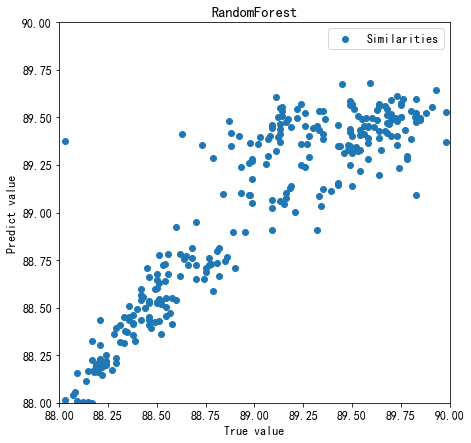

In [12]:
# 预测结果可视化
plt.style.use({'figure.figsize':(7,7)})
result = forest.predict(Xtest)
plt.figure()
plt.scatter(Ytest, result)
plt.xlim(88, 90)
plt.ylim(88, 90)
plt.xlabel('True value')
plt.ylabel('Predict value')
plt.title(f"RandomForest")
plt.legend(loc="best", labels = ['Similarities'])
plt.show()

In [13]:
rfr_score = forest.score(Xtest, Ytest)
print('rfr_score:',rfr_score.round(3))

from sklearn import metrics
rfr_rmse = metrics.mean_squared_error(Ytest,result) ** 0.5 # ,squared=False
print('rfr_rmse:',rfr_rmse.round(3))

rfr_score: 0.824
rfr_rmse: 0.236


r2:0.824
rmse:0.236

*********************

## Outliers & Shifting & Feature Engineeringmid_plc_df

In [14]:
mid_plc_df =  original_plc_df.copy()
# mid_plc_df.drop(['时间'], axis = 1, inplace = True)

#半自磨浓度

def concentration(df):
    Dry_weight = (df['给料皮带G1_矿量反馈'] + df['返料皮带F3_矿量']) * (1-0.009) + (df['给料皮带G1_矿量反馈'] * 0.001 * 0.61)
    Total_weight = df['给料皮带G1_矿量反馈'] + df['返料皮带F3_矿量'] + df['半自磨_给矿水流量反馈'] + (df['给料皮带G1_矿量反馈'] * 0.001 * 0.61)
    con = ((Dry_weight / Total_weight)) * 100
    df['半自磨浓度%'] = pd.DataFrame(con)
concentration(mid_plc_df)

In [15]:
mid_plc_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,半自磨浓度%
0,2022-02-24 15:19:01,912.156250,27.653999,116.778931,3450.0,3360.0,753.0,884.0,271.759216,20.833332,...,55.805847,3118.402832,0.078125,4470.0,4375.0,63.0,58.0,10.127314,99.305557,78.403884
1,2022-02-24 15:19:08,928.551147,27.653999,113.571762,3485.0,3435.0,752.0,884.0,270.138855,21.006943,...,57.527489,3118.402832,0.080208,4497.0,4462.0,63.0,58.0,8.680555,99.305557,78.708717
2,2022-02-24 15:19:14,904.703979,27.719997,112.251160,3365.0,3452.0,756.0,884.0,268.750000,21.006943,...,55.855034,3123.263672,0.077170,4420.0,4522.0,63.0,58.0,7.957175,99.363419,78.394474
3,2022-02-24 15:19:40,942.462158,27.653999,120.552078,3622.0,3547.0,755.0,878.0,266.203674,20.543980,...,56.420715,3134.201172,0.080035,4432.0,4390.0,63.0,58.0,7.233796,99.363419,79.262123
4,2022-02-24 15:19:47,953.392090,27.653999,117.722214,3570.0,3412.0,756.0,876.0,266.435181,20.601852,...,56.740448,3137.847168,0.081250,4422.0,4487.0,63.0,58.0,7.957175,99.363419,79.368597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210812,2022-05-29 11:39:59,958.360229,28.181999,151.869202,3217.0,3202.0,718.0,834.0,226.851837,19.589119,...,55.707458,2984.722168,0.069618,4862.0,4857.0,60.0,57.0,8.680555,99.971054,82.294240
1210813,2022-05-29 11:40:04,972.271118,28.115997,150.925903,3175.0,3097.0,717.0,834.0,226.851837,19.704861,...,55.018806,2994.444336,0.068750,4872.0,4875.0,60.0,57.0,8.680555,99.971054,82.455705
1210814,2022-05-29 11:40:09,998.602417,28.181999,150.359955,3175.0,3227.0,713.0,832.0,226.851837,19.589119,...,56.543694,3000.520508,0.070833,4810.0,4852.0,60.0,57.0,8.680555,100.000000,82.767475
1210815,2022-05-29 11:40:14,998.602417,28.181999,150.359955,3175.0,3227.0,713.0,832.0,226.851837,19.589119,...,56.543694,3000.520508,0.070833,4810.0,4852.0,60.0,57.0,8.680555,100.000000,82.767475


In [16]:
# fig, axes = plt.subplots(8,3)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
# fig.set_size_inches(20,20)

# sns.distplot(mid_plc_df['给料皮带G1_矿量反馈'],ax=axes[0,0],color='green')
# sns.distplot(mid_plc_df['返料皮带F3_电流'],ax=axes[0,1],color='green')
# sns.distplot(mid_plc_df['返料皮带F3_矿量'],ax=axes[0,2],color='green')
# sns.distplot(mid_plc_df['半自磨_功率1'],ax=axes[1,0],color='green')
# sns.distplot(mid_plc_df['半自磨_功率2'],ax=axes[1,1],color='green')
# sns.distplot(mid_plc_df['半自磨_进料端总高压'],ax=axes[1,2],color='green')
# sns.distplot(mid_plc_df['半自磨_出料端总高压'],ax=axes[2,0],color='green')
# sns.distplot(mid_plc_df['半自磨_给矿水流量反馈'],ax=axes[2,1],color='green')
# sns.distplot(mid_plc_df['半自磨_给矿水阀位'],ax=axes[2,2],color='green')
# sns.distplot(mid_plc_df['半自磨_排矿水流量'],ax=axes[3,0],color='green')
# sns.distplot(mid_plc_df['半自磨浓度%'],ax=axes[3,1],color='green')
# sns.distplot(mid_plc_df['直线筛_冲筛水流量'],ax=axes[3,2],color='green')
# sns.distplot(mid_plc_df['一段泵池_液位'],ax=axes[4,0],color='green')
# sns.distplot(mid_plc_df['一段泵池_补加水流量反馈'],ax=axes[4,1],color='green')
# sns.distplot(mid_plc_df['一段渣浆泵1_电流'],ax=axes[4,2],color='green')
# sns.distplot(mid_plc_df['一段渣浆泵1_矿浆流量反馈'],ax=axes[5,0],color='green')
# sns.distplot(mid_plc_df['一段旋流器1_压力'],ax=axes[5,1],color='green')
# sns.distplot(mid_plc_df['球磨机_功率1'],ax=axes[5,2],color='green')
# sns.distplot(mid_plc_df['球磨机_功率2'],ax=axes[6,0],color='green')
# sns.distplot(mid_plc_df['球磨机_进料端总高压'],ax=axes[6,1],color='green')
# sns.distplot(mid_plc_df['球磨机_出料端总高压'],ax=axes[6,2],color='green')
# sns.distplot(mid_plc_df['球磨机_排矿水流量'],ax=axes[7,0],color='green')
# sns.distplot(mid_plc_df['球磨机_排矿水阀位'],ax=axes[7,1],color='green')


# axes[0,0].set(xlabel='给料皮带G1_矿量反馈',title='给料皮带G1_矿量反馈',)
# axes[0,1].set(xlabel='返料皮带F3_电流',title='返料皮带F3_电流')
# axes[0,2].set(xlabel='返料皮带F3_矿量',title='返料皮带F3_矿量')
# axes[1,0].set(xlabel='半自磨_功率1',title='半自磨_功率1')
# axes[1,1].set(xlabel='半自磨_功率2',title='半自磨_功率2')
# axes[1,2].set(xlabel='半自磨_进料端总高压',title='半自磨_进料端总高压')
# axes[2,0].set(xlabel='半自磨_出料端总高压',title='半自磨_出料端总高压')
# axes[2,1].set(xlabel='半自磨_给矿水流量反馈',title='半自磨_给矿水流量反馈',)
# axes[2,2].set(xlabel='半自磨_给矿水阀位',title='半自磨_给矿水阀位',)
# axes[3,0].set(xlabel='半自磨_排矿水流量',title='半自磨_排矿水流量',)
# axes[3,1].set(xlabel='半自磨浓度%',title='半自磨浓度%',)
# axes[3,2].set(xlabel='直线筛_冲筛水流量',title='直线筛_冲筛水流量',)
# axes[4,0].set(xlabel='一段泵池_液位',title='一段泵池_液位',)
# axes[4,1].set(xlabel='一段泵池_补加水流量反馈',title='一段泵池_补加水流量反馈',)
# axes[4,2].set(xlabel='一段渣浆泵1_电流',title='一段渣浆泵1_电流',)
# axes[5,0].set(xlabel='一段渣浆泵1_矿浆流量反馈',title='一段渣浆泵1_矿浆流量反馈',)
# axes[5,1].set(xlabel='一段旋流器1_压力',title='一段旋流器1_压力',)
# axes[5,2].set(xlabel='球磨机_功率1',title='球磨机_功率1',)
# axes[6,0].set(xlabel='球磨机_功率2',title='球磨机_功率2',)
# axes[6,1].set(xlabel='球磨机_进料端总高压',title='球磨机_进料端总高压',)
# axes[6,2].set(xlabel='球磨机_出料端总高压',title='球磨机_出料端总高压',)
# axes[7,0].set(xlabel='球磨机_排矿水流量',title='球磨机_排矿水流量',)
# axes[7,1].set(xlabel='球磨机_排矿水阀位',title='球磨机_排矿水阀位',)

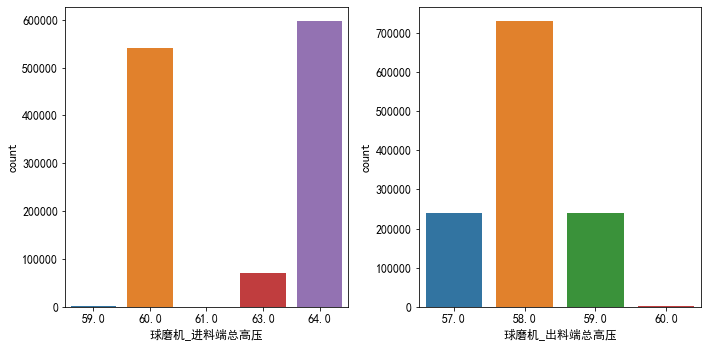

In [17]:
plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(original_plc_df['球磨机_进料端总高压'])
plt.subplot(1,2,2)
sns.countplot(original_plc_df['球磨机_出料端总高压'])

plt.tight_layout()

In [18]:
'''
（1）Skewness = 0 ，分布形态与正态分布偏度相同。
（2）Skewness > 0 ，正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值。
（3）Skewness < 0 ，负偏差数值较大，为负偏或左偏。长尾巴拖在左边，数据左端有较多的极端值。


（1）Kurtosis=0 与正态分布的陡缓程度相同。
（2）Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
（3）Kurtosis<0 比正态分布的高峰来得平台——平顶峰
'''

for i in mid_plc_df.iloc[:,1:].columns:
    skew = mid_plc_df[i].skew().round(3)
    kurt = mid_plc_df[i].kurt().round(3)
    print('{}---偏度为{};峰度为{}'.format(i,skew,kurt))

给料皮带G1_矿量反馈---偏度为-7.12;峰度为165.743
返料皮带F3_电流---偏度为-0.056;峰度为-0.861
返料皮带F3_矿量---偏度为1.683;峰度为5.046
半自磨_功率1---偏度为0.492;峰度为1.837
半自磨_功率2---偏度为0.506;峰度为1.872
半自磨_进料端总高压---偏度为0.835;峰度为-0.01
半自磨_出料端总高压---偏度为-0.652;峰度为-0.004
半自磨_给矿水流量反馈---偏度为1.895;峰度为9.623
半自磨_给矿水阀位---偏度为7.064;峰度为59.264
半自磨_排矿水流量---偏度为0.626;峰度为-0.524
直线筛_冲筛水流量---偏度为-0.751;峰度为0.137
一段泵池_液位---偏度为-3.641;峰度为21.708
一段泵池_补加水流量反馈---偏度为-0.537;峰度为0.436
一段渣浆泵1_电流---偏度为-0.505;峰度为1.172
一段渣浆泵1_矿浆流量反馈---偏度为0.022;峰度为1.073
一段旋流器1_压力---偏度为0.373;峰度为5.366
球磨机_功率1---偏度为-0.164;峰度为-0.422
球磨机_功率2---偏度为-0.156;峰度为-0.417
球磨机_进料端总高压---偏度为-0.172;峰度为-1.935
球磨机_出料端总高压---偏度为0.027;峰度为-0.414
球磨机_排矿水流量---偏度为0.973;峰度为0.723
球磨机_排矿水阀位---偏度为-0.661;峰度为-0.479
半自磨浓度%---偏度为-8.396;峰度为260.076


In [ ]:
def cdf(df):
    denominator = len(df)
    minpoint_lst = []
    maxpoint_lst = []
    
    for cols in df.columns:
        Data = pd.Series(df[cols])
        Fre = Data.value_counts()
        Fre_sort = Fre.sort_index(axis = 0, ascending = True)
        Fre_df = Fre_sort.reset_index()
        Fre_df.columns = ['nums', 'fre']
        Fre_df['fre']=Fre_df['fre']/denominator
        Fre_df['cumsum']=np.cumsum(Fre_df['fre'])

        #创建画布
        plot=plt.figure()
        #只有一张图，也可以多张
        ax1=plot.add_subplot(1,1,1)
        #按照Rds列为横坐标，累计概率分布为纵坐标作图
        ax1.plot(Fre_df['nums'],Fre_df['cumsum'])
        #图的标题
        ax1.set_title('CDF-{}'.format(cols))
        #横轴名
        ax1.set_xlabel('{}'.format(cols))
        #纵轴名
        ax1.set_ylabel('Cumulative percentage')
        #横轴的界限
        # ax1.set_xlim(0.1,0.5)
        #图片显示
        plt.show()
        
        max_df = Fre_df.loc[Fre_df['cumsum'] < 0.995]
        maxpoint = max_df['nums'].max()
        maxpoint = round(maxpoint,2)
        
        min_df = Fre_df.loc[Fre_df['cumsum'] > 0.005]
        minpoint = min_df['nums'].min()
        minpoint = round(minpoint,2)
        
        print('{}累计分布0.5%下界为{}，99.5%上界为{}'.format(cols, minpoint, maxpoint))
        print("\n"*2)
        minpoint_lst.append(minpoint)
        maxpoint_lst.append(maxpoint)

cdf(mid_plc_df.iloc[:,1:])

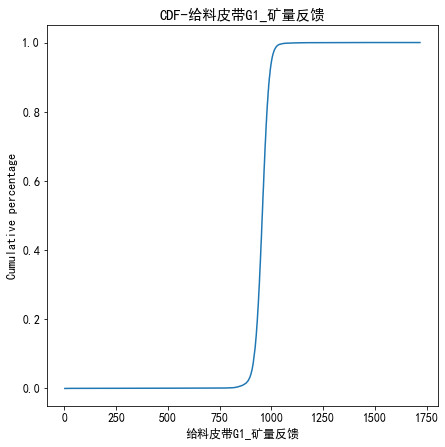

给料皮带G1_矿量反馈累计分布0.5%下界为840.61，99.5%上界为1040.33





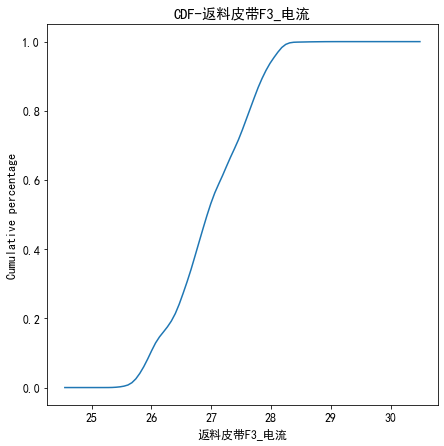

返料皮带F3_电流累计分布0.5%下界为25.61，99.5%上界为28.25





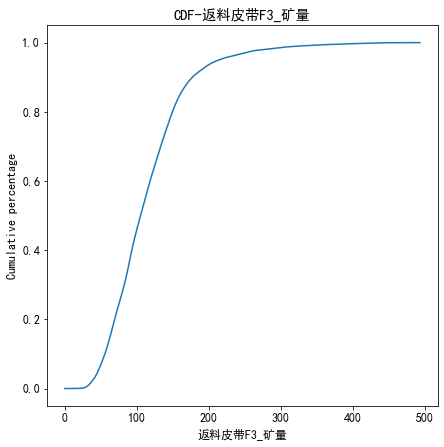

返料皮带F3_矿量累计分布0.5%下界为30.37，99.5%上界为373.54





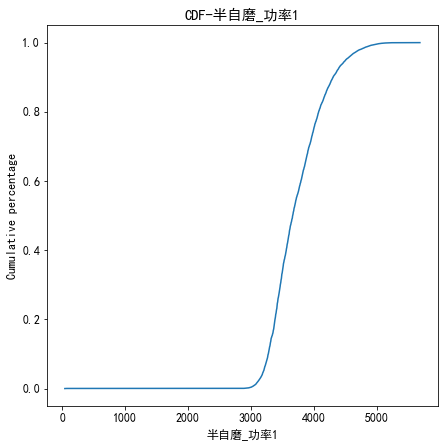

半自磨_功率1累计分布0.5%下界为3015.0，99.5%上界为4977.0





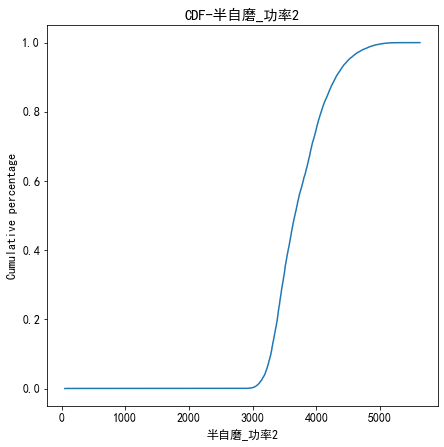

半自磨_功率2累计分布0.5%下界为3035.0，99.5%上界为4972.0





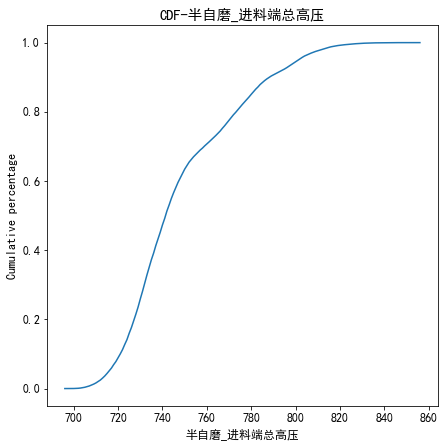

半自磨_进料端总高压累计分布0.5%下界为706.0，99.5%上界为823.0





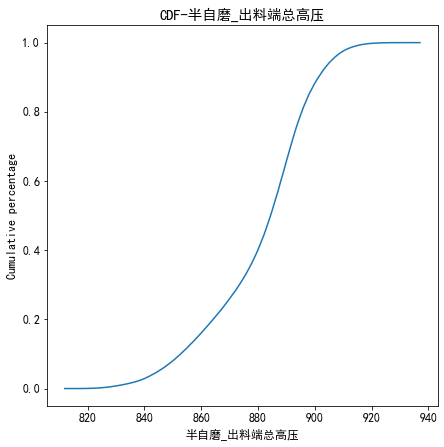

半自磨_出料端总高压累计分布0.5%下界为828.0，99.5%上界为916.0





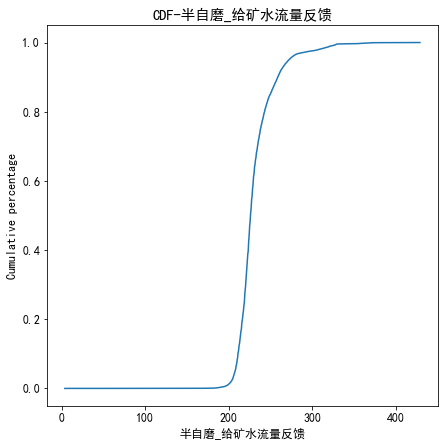

半自磨_给矿水流量反馈累计分布0.5%下界为193.52，99.5%上界为328.47





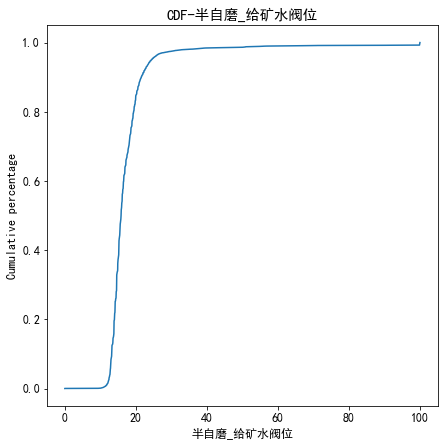

半自磨_给矿水阀位累计分布0.5%下界为11.2，99.5%上界为99.88





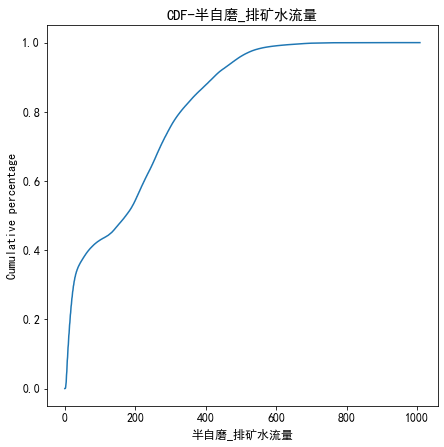

半自磨_排矿水流量累计分布0.5%下界为3.04，99.5%上界为645.4





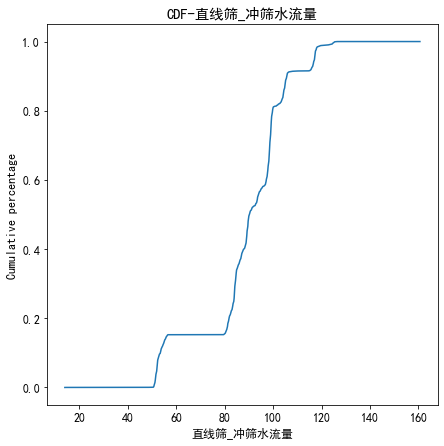

直线筛_冲筛水流量累计分布0.5%下界为50.93，99.5%上界为124.57





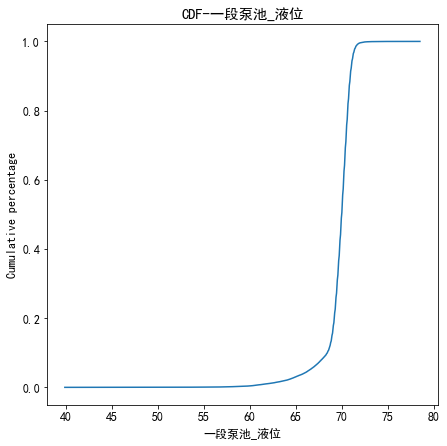

一段泵池_液位累计分布0.5%下界为60.36，99.5%上界为71.88





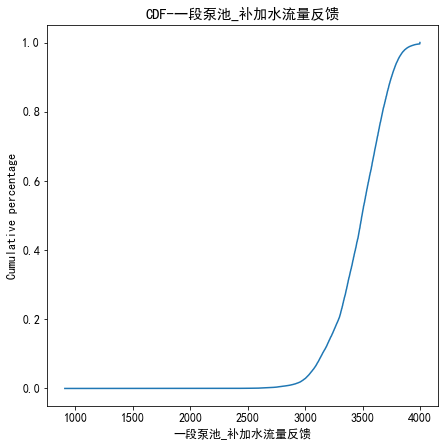

一段泵池_补加水流量反馈累计分布0.5%下界为2774.31，99.5%上界为3972.22





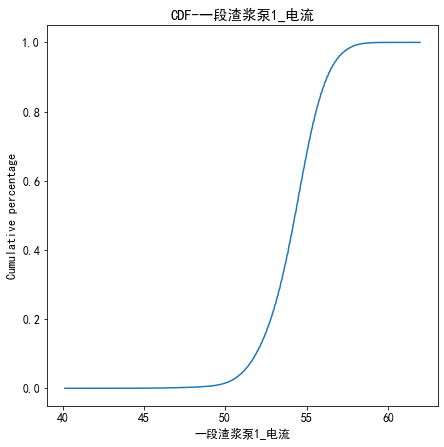

一段渣浆泵1_电流累计分布0.5%下界为48.72，99.5%上界为58.22





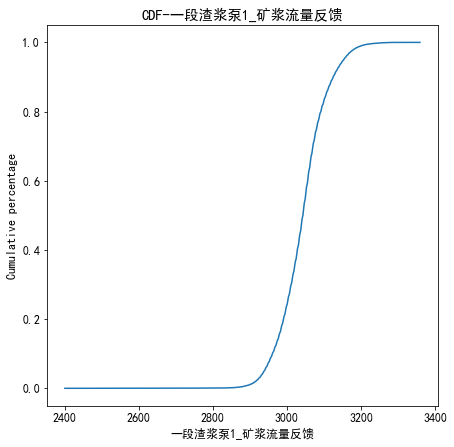

一段渣浆泵1_矿浆流量反馈累计分布0.5%下界为2881.42，99.5%上界为3219.27





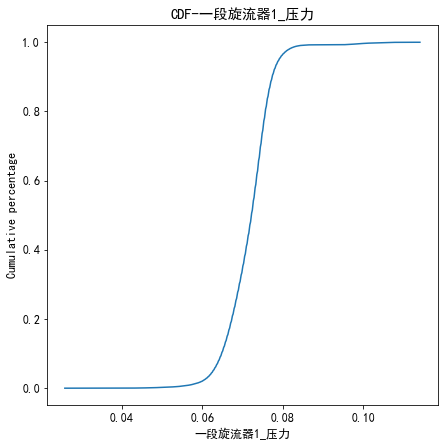

一段旋流器1_压力累计分布0.5%下界为0.05，99.5%上界为0.1





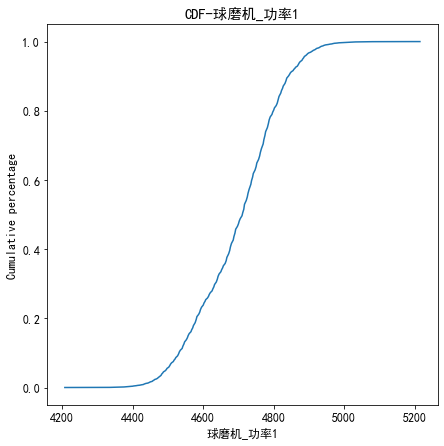

球磨机_功率1累计分布0.5%下界为4410.0，99.5%上界为4970.0





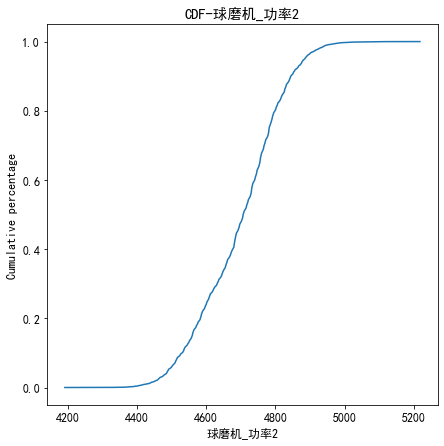

球磨机_功率2累计分布0.5%下界为4405.0，99.5%上界为4975.0





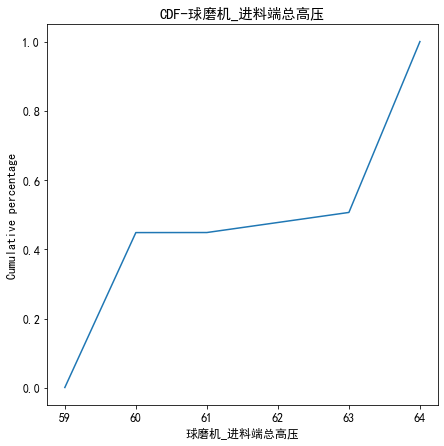

球磨机_进料端总高压累计分布0.5%下界为60.0，99.5%上界为63.0





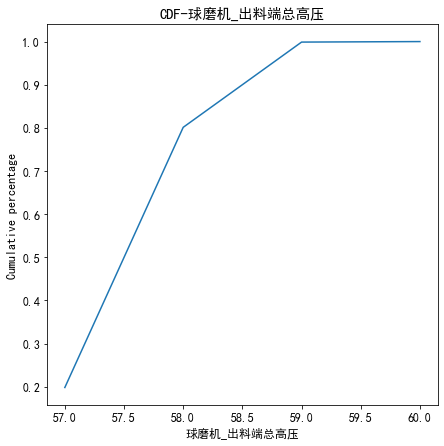

球磨机_出料端总高压累计分布0.5%下界为57.0，99.5%上界为58.0





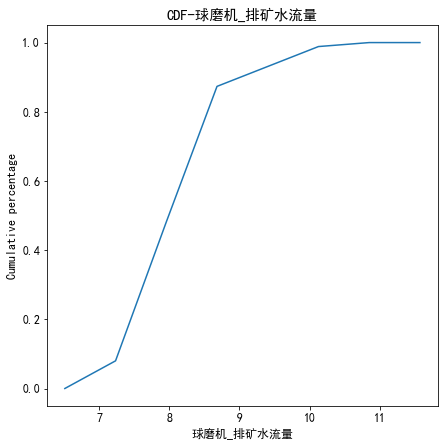

球磨机_排矿水流量累计分布0.5%下界为7.23，99.5%上界为10.13





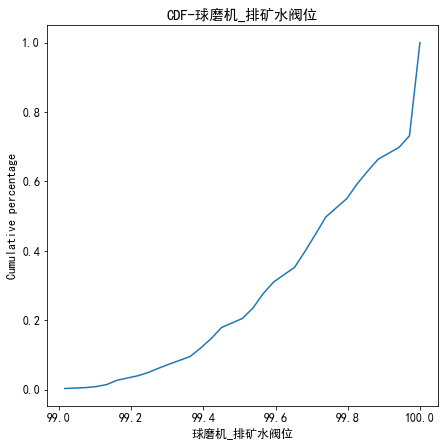

球磨机_排矿水阀位累计分布0.5%下界为99.07，99.5%上界为99.97





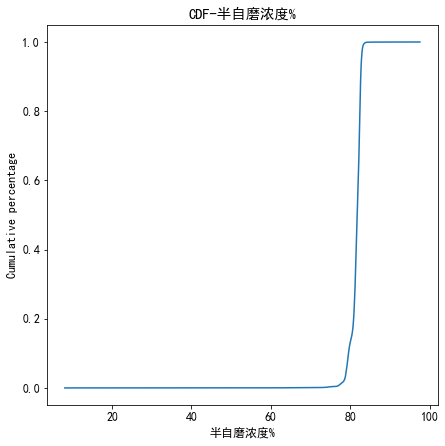

半自磨浓度%累计分布0.5%下界为76.68，99.5%上界为83.46





In [19]:
# denominator = len(mid_plc_df)

# minpoint_lst = []
# maxpoint_lst = []

# def cdf(df):
#     for cols in df.columns:
#         Data = pd.Series(df[cols])
#         Fre = Data.value_counts()
#         Fre_sort = Fre.sort_index(axis = 0, ascending = True)
#         Fre_df = Fre_sort.reset_index()
#         Fre_df.columns = ['nums', 'fre']
#         Fre_df['fre']=Fre_df['fre']/denominator
#         Fre_df['cumsum']=np.cumsum(Fre_df['fre'])

#         #创建画布
#         plot=plt.figure()
#         #只有一张图，也可以多张
#         ax1=plot.add_subplot(1,1,1)
#         #按照Rds列为横坐标，累计概率分布为纵坐标作图
#         ax1.plot(Fre_df['nums'],Fre_df['cumsum'])
#         #图的标题
#         ax1.set_title('CDF-{}'.format(cols))
#         #横轴名
#         ax1.set_xlabel('{}'.format(cols))
#         #纵轴名
#         ax1.set_ylabel('Cumulative percentage')
#         #横轴的界限
#         # ax1.set_xlim(0.1,0.5)
#         #图片显示
#         plt.show()
        
#         max_df = Fre_df.loc[Fre_df['cumsum'] < 0.995]
#         maxpoint = max_df['nums'].max()
#         maxpoint = round(maxpoint,2)
        
#         min_df = Fre_df.loc[Fre_df['cumsum'] > 0.005]
#         minpoint = min_df['nums'].min()
#         minpoint = round(minpoint,2)
        
#         print('{}累计分布0.5%下界为{}，99.5%上界为{}'.format(cols, minpoint, maxpoint))
#         print("\n"*2)
#         minpoint_lst.append(minpoint)
#         maxpoint_lst.append(maxpoint)

# cdf(mid_plc_df.iloc[:,1:])

In [20]:
minoutlen_lst = []
maxoutlen_lst = []

mid_plc = mid_plc_df.iloc[:,1:]
for i in range(len(mid_plc.columns)):
    maxout_df = mid_plc[mid_plc.iloc[:,i] > maxpoint_lst[i]]
    maxout_len = len(maxout_df)
    maxoutlen_lst.append(maxout_len)
    
    minout_df = mid_plc[mid_plc.iloc[:,i] < minpoint_lst[i]]
    minout_len = len(minout_df)
    minoutlen_lst.append(minout_len)
    
feature_lst = list(mid_plc.columns)

out_dic = {'特征':feature_lst, '下限值':minpoint_lst, '下限样本数量':minoutlen_lst, '上限值':maxpoint_lst, '上限样本数量':maxoutlen_lst}
out_df = pd.DataFrame(out_dic)
out_df

,特征,下限值,下限样本数量,上限值,上限样本数量
0,给料皮带G1_矿量反馈,840.61,6002,1040.33,6331
1,返料皮带F3_电流,25.61,8963,28.25,9588
2,返料皮带F3_矿量,30.37,5904,373.54,6079
3,半自磨_功率1,3015.00,5623,4977.00,6125
4,半自磨_功率2,3035.00,5966,4972.00,6184
5,半自磨_进料端总高压,706.00,4488,823.00,6626
6,半自磨_出料端总高压,828.00,4937,916.00,7852
7,半自磨_给矿水流量反馈,193.52,6196,328.47,6707
8,半自磨_给矿水阀位,11.20,6176,99.88,8815
9,半自磨_排矿水流量,3.04,7705,645.40,6064


In [21]:
mid_plc_df =  original_plc_df.copy()
# mid_plc_df.drop(['时间'], axis = 1, inplace = True)

#半自磨浓度

def concentration(df):
    Dry_weight = (df['给料皮带G1_矿量反馈'] + df['返料皮带F3_矿量']) * (1-0.009) + (df['给料皮带G1_矿量反馈'] * 0.001 * 0.61)
    Total_weight = df['给料皮带G1_矿量反馈'] + df['返料皮带F3_矿量'] + df['半自磨_给矿水流量反馈'] + (df['给料皮带G1_矿量反馈'] * 0.001 * 0.61)
    con = ((Dry_weight / Total_weight)) * 100
    df['半自磨浓度%'] = pd.DataFrame(con)
concentration(mid_plc_df)

In [22]:
mid_plc_df = mid_plc_df[(mid_plc_df['给料皮带G1_矿量反馈'] > 840.61) & (mid_plc_df['给料皮带G1_矿量反馈'] < 1040.33)]
mid_plc_df = mid_plc_df[(mid_plc_df['返料皮带F3_电流'] > 25.61) & (mid_plc_df['返料皮带F3_电流'] < 28.25)]
mid_plc_df = mid_plc_df[(mid_plc_df['返料皮带F3_矿量'] > 30.37) & (mid_plc_df['返料皮带F3_矿量'] < 373.54)]
mid_plc_df = mid_plc_df[(mid_plc_df['半自磨_功率1'] > 3015) & (mid_plc_df['半自磨_功率1'] < 4977)]
mid_plc_df = mid_plc_df[(mid_plc_df['半自磨_功率2'] > 3035) & (mid_plc_df['半自磨_功率2'] < 4972)]
mid_plc_df = mid_plc_df[(mid_plc_df['半自磨_进料端总高压'] > 706) & (mid_plc_df['半自磨_进料端总高压'] < 823)]
mid_plc_df = mid_plc_df[(mid_plc_df['半自磨_出料端总高压'] > 828) & (mid_plc_df['半自磨_出料端总高压'] < 916)]
mid_plc_df = mid_plc_df[(mid_plc_df['半自磨_给矿水流量反馈'] > 193.52) & (mid_plc_df['半自磨_给矿水流量反馈'] < 328.47)]
mid_plc_df = mid_plc_df[(mid_plc_df['半自磨_给矿水阀位'] > 11.2) & (mid_plc_df['半自磨_给矿水阀位'] < 99.88)]
mid_plc_df = mid_plc_df[(mid_plc_df['半自磨_排矿水流量'] > 3.04) & (mid_plc_df['半自磨_排矿水流量'] < 645.4)]
mid_plc_df = mid_plc_df[(mid_plc_df['半自磨浓度%'] > 76.68) & (mid_plc_df['半自磨浓度%'] < 83.46)]
mid_plc_df = mid_plc_df[(mid_plc_df['直线筛_冲筛水流量'] > 50.93) & (mid_plc_df['直线筛_冲筛水流量'] < 124.57)]
mid_plc_df = mid_plc_df[(mid_plc_df['一段泵池_液位'] > 60.36) & (mid_plc_df['一段泵池_液位'] < 71.88)]
mid_plc_df = mid_plc_df[(mid_plc_df['一段泵池_补加水流量反馈'] > 2744.31) & (mid_plc_df['一段泵池_补加水流量反馈'] < 3972.22)]
mid_plc_df = mid_plc_df[(mid_plc_df['一段渣浆泵1_电流'] > 48.72) & (mid_plc_df['一段渣浆泵1_电流'] < 58.22)]
mid_plc_df = mid_plc_df[(mid_plc_df['一段渣浆泵1_矿浆流量反馈'] > 2881.42) & (mid_plc_df['一段渣浆泵1_矿浆流量反馈'] < 3219.27)]
mid_plc_df = mid_plc_df[(mid_plc_df['一段旋流器1_压力'] > 0.05) & (mid_plc_df['一段旋流器1_压力'] < 0.1)]
mid_plc_df = mid_plc_df[(mid_plc_df['球磨机_功率1'] > 4410) & (mid_plc_df['球磨机_功率1'] < 4970)]
mid_plc_df = mid_plc_df[(mid_plc_df['球磨机_功率2'] > 4405) & (mid_plc_df['球磨机_功率2'] < 4975)]
mid_plc_df = mid_plc_df[(mid_plc_df['球磨机_排矿水流量'] > 7.23) & (mid_plc_df['球磨机_排矿水流量'] < 10.13)]

mid_plc_df.reset_index(inplace = True, drop=True)
mid_plc_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,半自磨浓度%
0,2022-02-24 15:19:08,928.551147,27.653999,113.571762,3485.0,3435.0,752.0,884.0,270.138855,21.006943,...,57.527489,3118.402832,0.080208,4497.0,4462.0,63.0,58.0,8.680555,99.305557,78.708717
1,2022-02-24 15:19:14,904.703979,27.719997,112.251160,3365.0,3452.0,756.0,884.0,268.750000,21.006943,...,55.855034,3123.263672,0.077170,4420.0,4522.0,63.0,58.0,7.957175,99.363419,78.394474
2,2022-02-24 15:19:47,953.392090,27.653999,117.722214,3570.0,3412.0,756.0,876.0,266.435181,20.601852,...,56.740448,3137.847168,0.081250,4422.0,4487.0,63.0,58.0,7.957175,99.363419,79.368597
3,2022-02-24 15:19:55,996.118408,27.719997,119.042816,3525.0,3432.0,753.0,882.0,266.666687,20.659721,...,55.953415,3152.430664,0.079167,4420.0,4487.0,63.0,58.0,10.127314,99.363419,79.984373
4,2022-02-24 15:20:01,944.946167,27.719997,119.042816,3475.0,3435.0,759.0,890.0,265.509216,21.614582,...,55.953415,3160.937500,0.078906,4522.0,4430.0,63.0,57.0,8.680555,99.363419,79.318069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027598,2022-05-29 11:39:59,958.360229,28.181999,151.869202,3217.0,3202.0,718.0,834.0,226.851837,19.589119,...,55.707458,2984.722168,0.069618,4862.0,4857.0,60.0,57.0,8.680555,99.971054,82.294240
1027599,2022-05-29 11:40:04,972.271118,28.115997,150.925903,3175.0,3097.0,717.0,834.0,226.851837,19.704861,...,55.018806,2994.444336,0.068750,4872.0,4875.0,60.0,57.0,8.680555,99.971054,82.455705
1027600,2022-05-29 11:40:09,998.602417,28.181999,150.359955,3175.0,3227.0,713.0,832.0,226.851837,19.589119,...,56.543694,3000.520508,0.070833,4810.0,4852.0,60.0,57.0,8.680555,100.000000,82.767475
1027601,2022-05-29 11:40:14,998.602417,28.181999,150.359955,3175.0,3227.0,713.0,832.0,226.851837,19.589119,...,56.543694,3000.520508,0.070833,4810.0,4852.0,60.0,57.0,8.680555,100.000000,82.767475


In [23]:
# outcome_col = '1系列原矿处理量t/h'
# outcome_col = '1系列返矿量t/h'
# outcome_col = '1系列1段旋流器A组溢流浓度/%'
# outcome_col = '1系列强磁尾矿品位TFe/%'
outcome_col = '1系列1段旋流器A组溢流粒度/-200目'

# target_cols = ['半自磨_功率1', '半自磨_功率2', '球磨机_功率1', '球磨机_功率2']
# target_cols = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '半自磨_进料端总高压','一段泵池_液位', '一段渣浆泵1_矿浆流量反馈', '一段渣浆泵2_矿浆流量反馈','一段旋流器1_压力', '球磨机_出料端总高压']
target_cols = ['给料皮带G1_矿量反馈', '返料皮带F3_矿量', '半自磨_功率1', '一段泵池_液位', '一段渣浆泵1_电流', '一段旋流器1_压力', '球磨机_功率1']
shifting_labels = ['平均值时间范围（分钟）', '时间戳移动量（分钟）']

huayan_df = original_huayan_df[['时间'] + [outcome_col]].copy()

all_shifted_df = []

for group_time_min in (0.5, 1, 5, 10, 15):
    for shifted_time_min in (0, 1, 5, 10, 20, 30, 60):
        if (group_time_min / 2) > shifted_time_min:
            continue
        plc_df = mid_plc_df[['时间'] + target_cols].copy()

        plc_df.loc[:, '时间'] = plc_df.loc[:, '时间'] - timedelta(minutes=shifted_time_min)
        plc_df.loc[:, '时间'] = plc_df.loc[:, '时间'].dt.round(f'{group_time_min}min')

        plc_df = plc_df.groupby("时间").mean().reset_index()

        shifted_corr_single_df = huayan_df.merge(plc_df, how="left", on="时间").dropna().corr().loc[[outcome_col], target_cols].abs().round(2)
        shifted_corr_single_df[shifting_labels] = (group_time_min, shifted_time_min)
        
        all_shifted_df.append(shifted_corr_single_df)
all_shifted_df = pd.concat(all_shifted_df).reset_index(drop=True)

对于给料皮带G1_矿量反馈, 使用10分钟之前，前后共5分钟数据的平均值 (相关系数绝对值: 0.170)


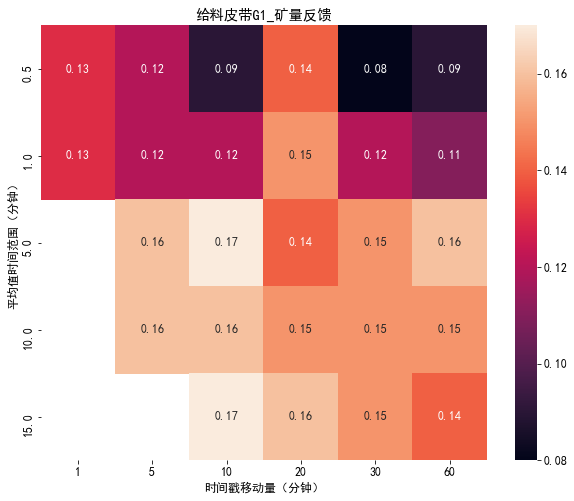





对于返料皮带F3_矿量, 使用60分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.210)


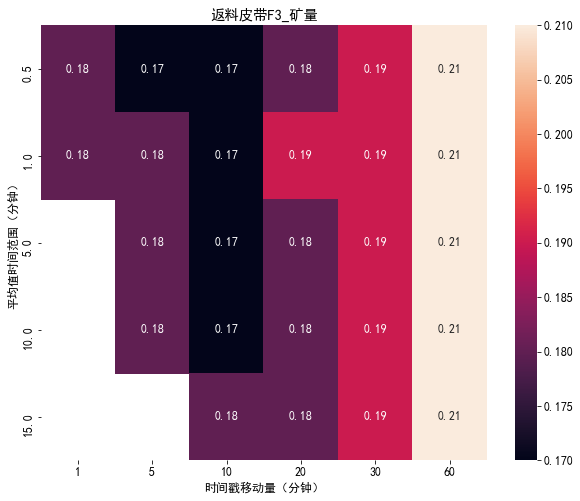





对于半自磨_功率1, 使用5分钟之前，前后共1分钟数据的平均值 (相关系数绝对值: 0.200)


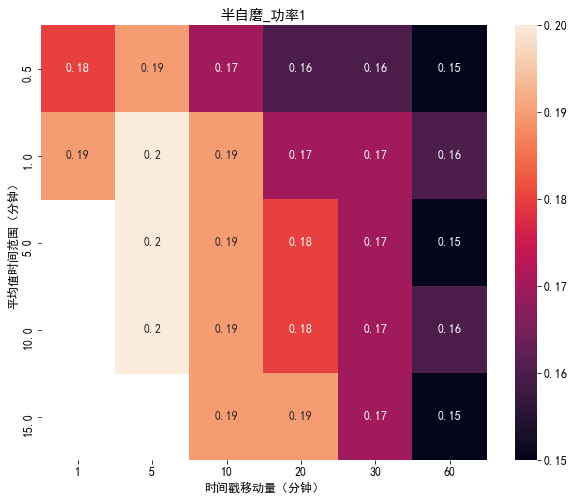





对于一段泵池_液位, 使用1分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.050)


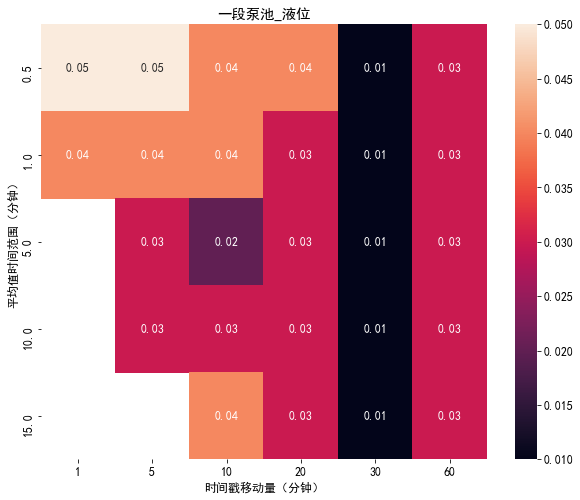





对于一段渣浆泵1_电流, 使用10分钟之前，前后共10分钟数据的平均值 (相关系数绝对值: 0.190)


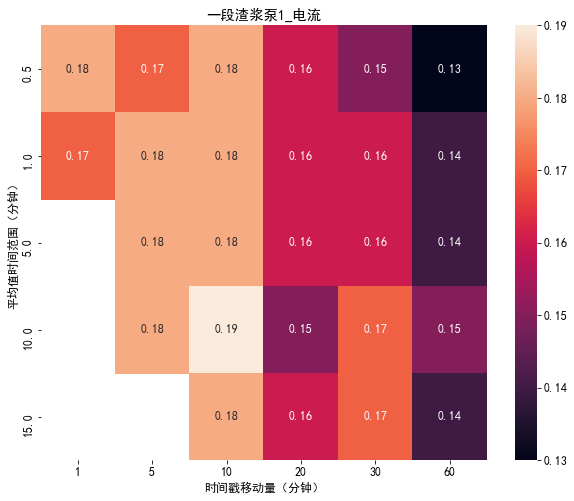





对于一段旋流器1_压力, 使用60分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.240)


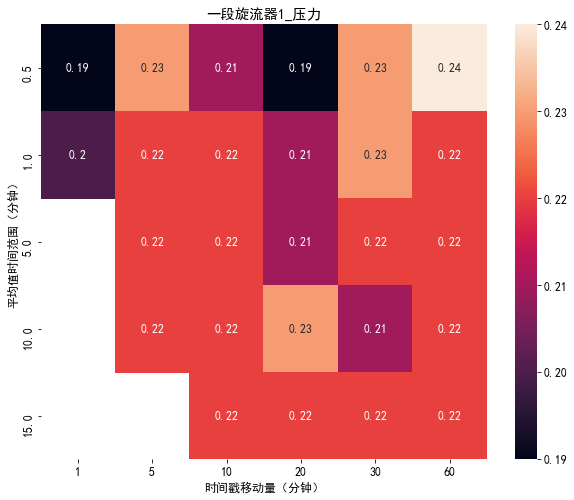





对于球磨机_功率1, 使用1分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.050)


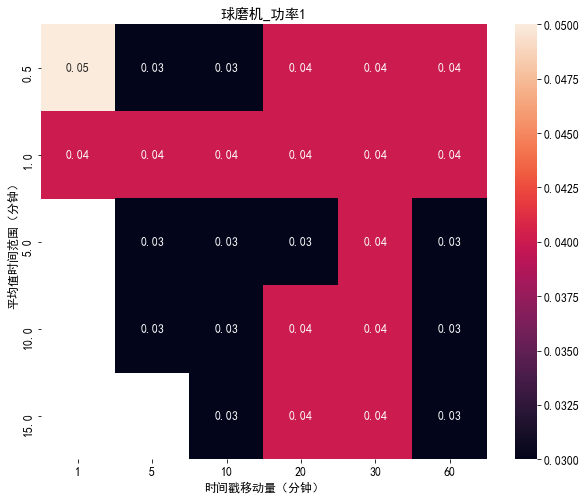

In [24]:
for corr_col in target_cols:
    plt.figure(figsize=(10, 8))
    pivoted_hm_df = pd.pivot_table(all_shifted_df, values=corr_col, index=shifting_labels[0], columns=shifting_labels[1])
    sns.heatmap(pivoted_hm_df, annot=True)
    plt.title(corr_col)
    
    group_time_min, shifted_time_min, corr_val = all_shifted_df.loc[all_shifted_df[corr_col].idxmax(), shifting_labels + [corr_col]]
    print(f"对于{corr_col}, 使用{shifted_time_min:g}分钟之前，前后共{group_time_min:g}分钟数据的平均值 (相关系数绝对值: {corr_val:.3f})")
    plt.show()
    print("\n"*3)

In [25]:
df0 = mid_plc_df[['时间','给料皮带G1_矿量反馈']]
df1 = mid_plc_df[['时间','返料皮带F3_电流', '返料皮带F3_矿量']]
df2 = mid_plc_df[['时间','半自磨_功率1', '半自磨_功率2','半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', 
                       '半自磨_给矿水阀位','半自磨_排矿水流量', '半自磨浓度%', '直线筛_冲筛水流量']]
df3 = mid_plc_df[['时间','一段泵池_液位', '一段泵池_补加水流量反馈']]
df4 = mid_plc_df[['时间','一段渣浆泵1_电流', '一段渣浆泵1_矿浆流量反馈']]

df5 = mid_plc_df[['时间','一段旋流器1_压力']]
df6 = mid_plc_df[['时间','球磨机_功率1','球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位']]

In [26]:
df_set = [df0,df1,df2,df3,df4,df5,df6]
shift = [10,20,10,5,5,5,1]
freq = ['5min','5min','5min','5min','5min','5min','1min']
for i in range(7):
    lll = len(df_set[i].columns)
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'] - timedelta(minutes=shift[i])
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'].dt.round(freq[i])
    df_set[i] = df_set[i].groupby("时间").mean().reset_index()
    df_set[i] = df_set[i].merge(original_huayan_df, how="left", on="时间").dropna(axis = 0,how = 'any')

    df_set[i] = df_set[i].iloc[:,:lll]
    df_set[i].reset_index(inplace=True,drop=True)

In [27]:
from functools import reduce

df_list = [df_set[0],df_set[1],df_set[2],df_set[3],df_set[4],df_set[5],df_set[6], original_huayan_df]
mid_df = reduce(lambda left, right: pd.merge(left, right, on=['时间']), df_list)
mid_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%,1系列1段旋流器A组溢流粒度/-200目
0,2022-02-26 17:00:00,957.993510,27.528286,66.349009,3521.738095,3535.261905,747.642857,876.833333,211.838611,15.186838,...,2948.678067,0.070038,4520.888889,4511.333333,64.0,58.000000,8.519804,99.421295,19.81,88.63
1,2022-02-26 23:00:00,964.265569,25.764557,53.034667,3452.795455,3437.045455,743.681818,876.250000,206.150036,13.085279,...,2953.238815,0.070733,4565.250000,4564.750000,63.0,58.000000,8.590132,99.276611,20.46,88.86
2,2022-02-27 01:00:00,956.906566,25.727428,69.646022,3576.814815,3596.814815,753.185185,883.740741,211.754106,13.916752,...,2954.401001,0.068412,4543.333333,4554.833333,64.0,58.000000,8.318865,99.218750,18.02,89.41
3,2022-02-27 03:00:00,957.932719,25.945673,55.228357,3458.255814,3472.093023,749.255814,881.046512,206.546075,13.852551,...,2948.177025,0.070387,4541.888889,4535.222222,63.0,58.000000,8.198302,99.160873,20.06,88.50
4,2022-02-27 05:00:00,957.138306,25.800648,54.277244,3446.162162,3470.621622,750.594595,884.810811,207.864102,13.895927,...,2941.848258,0.069239,4537.000000,4546.250000,63.0,58.000000,7.957175,99.103012,20.54,88.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,2022-05-25 11:00:00,958.668596,27.629800,121.589695,3158.068966,3160.775862,723.689655,845.741379,219.879462,17.582614,...,3098.046753,0.076612,4824.500000,4814.916667,60.0,57.750000,8.198302,99.739578,20.73,88.49
880,2022-05-25 13:00:00,954.963937,26.931355,138.807078,3211.360656,3218.213115,723.409836,845.393443,223.850175,18.609592,...,3044.509806,0.073382,4791.083333,4792.833333,60.0,57.166667,9.042245,99.922836,20.62,88.47
881,2022-05-25 15:00:00,961.155861,27.608482,200.217546,3456.050847,3448.000000,730.762712,853.288136,234.161164,20.183517,...,2993.332031,0.070018,4856.666667,4833.833333,60.0,57.000000,8.559992,100.000000,20.97,88.24
882,2022-05-25 17:00:00,961.597809,27.947698,156.689400,3235.133333,3232.433333,722.333333,842.650000,229.359573,19.551022,...,2999.021859,0.069097,4815.750000,4858.000000,60.0,57.000000,8.379147,100.000000,20.99,88.21


In [28]:
mid_df["球磨机_进料端总高压"] = list(map(int, mid_df["球磨机_进料端总高压"]))
mid_df["球磨机_出料端总高压"] = list(map(int, mid_df["球磨机_出料端总高压"]))

In [29]:
mid_df.corr()['1系列1段旋流器A组溢流粒度/-200目'].sort_values(ascending=False)

1系列1段旋流器A组溢流粒度/-200目    1.000000
一段泵池_补加水流量反馈            0.345848
球磨机_出料端总高压              0.316100
半自磨_出料端总高压              0.299551
球磨机_进料端总高压              0.206978
一段旋流器1_压力               0.201500
半自磨_功率1                 0.174331
半自磨_功率2                 0.170972
一段渣浆泵1_矿浆流量反馈           0.156994
半自磨_进料端总高压              0.089463
直线筛_冲筛水流量               0.081286
球磨机_排矿水流量               0.080750
一段泵池_液位                 0.038111
返料皮带F3_电流              -0.028477
半自磨_排矿水流量              -0.037503
球磨机_功率1                -0.042470
球磨机_功率2                -0.050121
半自磨_给矿水流量反馈            -0.054895
半自磨浓度%                 -0.067009
球磨机_排矿水阀位              -0.109404
给料皮带G1_矿量反馈            -0.164587
返料皮带F3_矿量              -0.178362
一段渣浆泵1_电流              -0.183593
半自磨_给矿水阀位              -0.292513
1系列1段旋流器A组溢流浓度/%       -0.874712
Name: 1系列1段旋流器A组溢流粒度/-200目, dtype: float64

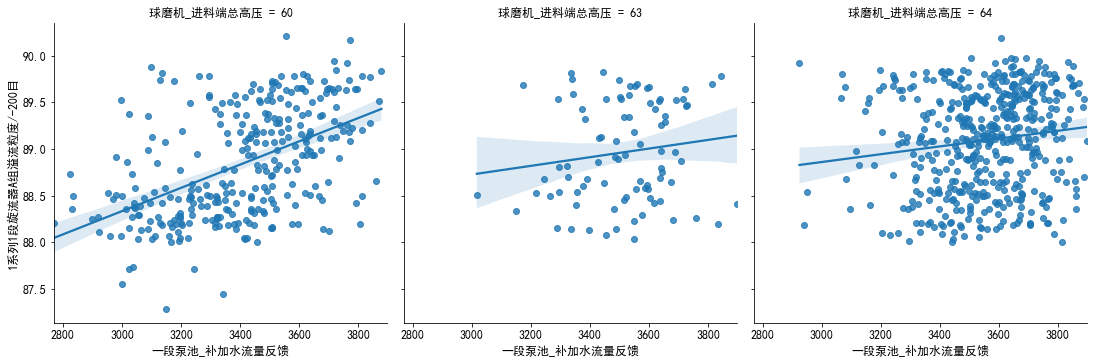

In [30]:
sns.lmplot(x="一段泵池_补加水流量反馈", y="1系列1段旋流器A组溢流粒度/-200目", 
           data=mid_df, col="球磨机_进料端总高压", col_wrap=4, aspect=1) 

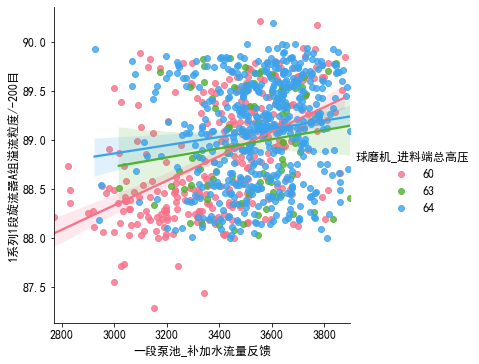

In [31]:
sns.lmplot(x="一段泵池_补加水流量反馈", y="1系列1段旋流器A组溢流粒度/-200目", 
           data=mid_df, hue="球磨机_进料端总高压", palette="husl") 

In [32]:
from sklearn.preprocessing import StandardScaler

target = mid_df['1系列1段旋流器A组溢流粒度/-200目']
regressors = [x for x in mid_df.columns if x not in ['时间','1系列1段旋流器A组溢流粒度/-200目']]
features = mid_df[regressors] 
features=StandardScaler().fit_transform(features) #进行标准化处理
features = pd.DataFrame(features)
c = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '返料皮带F3_矿量', '半自磨_功率1', '半自磨_功率2',
       '半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', '半自磨_给矿水阀位', '半自磨_排矿水流量',
       '半自磨浓度%', '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈', '一段渣浆泵1_电流',
       '一段渣浆泵1_矿浆流量反馈', '一段旋流器1_压力', '球磨机_功率1', '球磨机_功率2', '球磨机_进料端总高压',
       '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位', '1系列1段旋流器A组溢流浓度/%']
features.columns = c
features.head()

,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,半自磨_排矿水流量,...,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%
0,0.210072,0.823429,-0.892612,-0.595706,-0.561196,0.018600,-0.318624,-1.011549,-0.365359,-0.977971,...,-1.902860,-1.700046,-0.482923,-1.664280,-1.764500,0.805589,0.005649,0.076000,-1.199291,-0.031122
1,0.717825,-1.730821,-1.186015,-0.775762,-0.818449,-0.144060,-0.355709,-1.345931,-1.072601,1.037441,...,-1.690714,-1.617340,-0.324692,-1.219626,-1.228826,0.267312,0.005649,0.226692,-1.781126,0.742339
2,0.122079,-1.784592,-0.819957,-0.451863,-0.399974,0.246195,0.120500,-1.016517,-0.792784,1.112212,...,-1.996720,-1.596264,-0.853385,-1.439308,-1.328272,0.805589,0.005649,-0.354548,-2.013809,-2.161114
3,0.205151,-1.468526,-1.137674,-0.761502,-0.726651,0.084836,-0.050780,-1.322651,-0.814389,1.238042,...,-1.628563,-1.709132,-0.403505,-1.453786,-1.524937,0.267312,0.005649,-0.612877,-2.246557,0.266363
4,0.140840,-1.678554,-1.158633,-0.793087,-0.730505,0.139813,0.188528,-1.245176,-0.799792,0.599247,...,-1.790473,-1.823899,-0.665036,-1.502790,-1.414348,0.267312,0.005649,-1.129535,-2.479240,0.837535


In [33]:
#分割训练集测试集
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size = 0.3,random_state=seed)

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=seed)
forest.fit(Xtrain,Ytrain)

RandomForestRegressor(random_state=123)

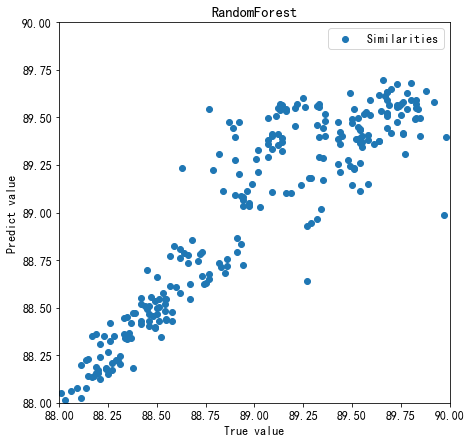

In [35]:
# 预测结果可视化
plt.style.use({'figure.figsize':(7,7)})
result = forest.predict(Xtest)
plt.figure()
plt.scatter(Ytest, result)
plt.xlim(88, 90)
plt.ylim(88, 90)
plt.xlabel('True value')
plt.ylabel('Predict value')
plt.title(f"RandomForest")
plt.legend(loc="best", labels = ['Similarities'])
plt.show()

In [36]:
rfr_score = forest.score(Xtest, Ytest)
print('rfr_score:',rfr_score.round(3))

from sklearn import metrics
rfr_rmse = metrics.mean_squared_error(Ytest,result) ** 0.5 # ,squared=False
print('rfr_rmse:',rfr_rmse.round(3))

rfr_score: 0.838
rfr_rmse: 0.229


*************************

In [37]:
nom_plc_df =  original_plc_df.copy()
# mid_plc_df.drop(['时间'], axis = 1, inplace = True)

#半自磨浓度

def concentration(df):
    Dry_weight = (df['给料皮带G1_矿量反馈'] + df['返料皮带F3_矿量']) * (1-0.009) + (df['给料皮带G1_矿量反馈'] * 0.001 * 0.61)
    Total_weight = df['给料皮带G1_矿量反馈'] + df['返料皮带F3_矿量'] + df['半自磨_给矿水流量反馈'] + (df['给料皮带G1_矿量反馈'] * 0.001 * 0.61)
    con = ((Dry_weight / Total_weight)) * 100
    df['半自磨浓度%'] = pd.DataFrame(con)
concentration(nom_plc_df)

In [38]:
from scipy.stats import boxcox

converted_lst = []
lambdas_lst = []

nom_plc = nom_plc_df.iloc[:,1:]
for i in nom_plc.columns:
    converted_data, lambdas = boxcox(nom_plc_df[i], lmbda=None, alpha=None)
#     print('{}转换后lambda为{}'.format(nom_plc_df[i], lambdas))
    nom_plc_df[i] = converted_data
    converted_lst.append(converted_data)
    lambdas_lst.append(lambdas)
    
nom_plc_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,半自磨浓度%
0,2022-02-24 15:19:01,6.559034e+07,358.929598,5.633830,915.098693,846.539181,0.094446,1.237886e+38,39.062054,2.835988,...,1.889809e+08,1073.375162,-1.260185,2.085057e+12,5.706646e+11,1.168284e+13,3.844490,0.365219,4.813845e+151,6.652023e+17
1,2022-02-24 15:19:08,6.893433e+07,358.929598,5.595209,922.636546,861.710448,0.094446,1.237886e+38,38.926006,2.843214,...,2.209627e+08,1073.375162,-1.254957,2.129787e+12,6.098646e+11,1.168284e+13,3.844490,0.364877,4.813845e+151,6.913479e+17
2,2022-02-24 15:19:14,6.410545e+07,360.628370,5.579010,896.732102,865.140175,0.094446,1.237886e+38,38.809107,2.843214,...,1.898396e+08,1074.793557,-1.262599,2.004005e+12,6.379780e+11,1.168284e+13,3.844490,0.364610,5.034380e+151,6.644095e+17
3,2022-02-24 15:19:40,7.185591e+07,358.929598,5.678022,952.006386,884.245758,0.094446,1.130612e+38,38.594090,2.823804,...,1.999428e+08,1077.983888,-1.255390,2.023248e+12,5.772929e+11,1.168284e+13,3.844490,0.364234,5.034380e+151,7.411862e+17
4,2022-02-24 15:19:47,7.420628e+07,358.929598,5.645001,940.883779,857.064912,0.094446,1.096810e+38,38.613676,2.826255,...,2.058421e+08,1079.047000,-1.252361,2.007203e+12,6.214702e+11,1.168284e+13,3.844490,0.364610,5.034380e+151,7.511374e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210812,2022-05-29 11:39:59,7.529072e+07,372.631073,6.001883,864.541962,814.357865,0.094446,5.703281e+37,35.146760,2.782285,...,1.872727e+08,1034.232284,-1.282083,2.804114e+12,8.119424e+11,8.001771e+12,3.828911,0.364877,8.045611e+151,1.076227e+18
1210813,2022-05-29 11:40:04,7.838113e+07,370.904477,5.993077,855.356539,792.799170,0.094446,5.703281e+37,35.146760,2.787429,...,1.756615e+08,1037.087937,-1.284371,2.824495e+12,8.221396e+11,8.001771e+12,3.828911,0.364877,8.045611e+151,1.097390e+18
1210814,2022-05-29 11:40:09,8.445125e+07,372.631073,5.987769,855.356539,819.470267,0.094446,5.523906e+37,35.146760,2.782285,...,2.021955e+08,1038.871945,-1.278899,2.699826e+12,8.091257e+11,8.001771e+12,3.828911,0.364877,8.226738e+151,1.139317e+18
1210815,2022-05-29 11:40:14,8.445125e+07,372.631073,5.987769,855.356539,819.470267,0.094446,5.523906e+37,35.146760,2.782285,...,2.021955e+08,1038.871945,-1.278899,2.699826e+12,8.091257e+11,8.001771e+12,3.828911,0.364877,8.226738e+151,1.139317e+18


In [39]:
# fig, axes = plt.subplots(8,3)
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
# fig.set_size_inches(20,20)

# sns.distplot(nom_plc_df['给料皮带G1_矿量反馈'],ax=axes[0,0],color='blue')
# sns.distplot(nom_plc_df['返料皮带F3_电流'],ax=axes[0,1],color='blue')
# sns.distplot(nom_plc_df['返料皮带F3_矿量'],ax=axes[0,2],color='blue')
# sns.distplot(nom_plc_df['半自磨_功率1'],ax=axes[1,0],color='blue')
# sns.distplot(nom_plc_df['半自磨_功率2'],ax=axes[1,1],color='blue')
# sns.distplot(nom_plc_df['半自磨_进料端总高压'],ax=axes[1,2],color='blue')
# sns.distplot(nom_plc_df['半自磨_出料端总高压'],ax=axes[2,0],color='blue')
# sns.distplot(nom_plc_df['半自磨_给矿水流量反馈'],ax=axes[2,1],color='blue')
# sns.distplot(nom_plc_df['半自磨_给矿水阀位'],ax=axes[2,2],color='blue')
# sns.distplot(nom_plc_df['半自磨_排矿水流量'],ax=axes[3,0],color='blue')
# sns.distplot(nom_plc_df['半自磨浓度%'],ax=axes[3,1],color='blue')
# sns.distplot(nom_plc_df['直线筛_冲筛水流量'],ax=axes[3,2],color='blue')
# sns.distplot(nom_plc_df['一段泵池_液位'],ax=axes[4,0],color='blue')
# sns.distplot(nom_plc_df['一段泵池_补加水流量反馈'],ax=axes[4,1],color='blue')
# sns.distplot(nom_plc_df['一段渣浆泵1_电流'],ax=axes[4,2],color='blue')
# sns.distplot(nom_plc_df['一段渣浆泵1_矿浆流量反馈'],ax=axes[5,0],color='blue')
# sns.distplot(nom_plc_df['一段旋流器1_压力'],ax=axes[5,1],color='blue')
# sns.distplot(nom_plc_df['球磨机_功率1'],ax=axes[5,2],color='blue')
# sns.distplot(nom_plc_df['球磨机_功率2'],ax=axes[6,0],color='blue')
# sns.distplot(nom_plc_df['球磨机_进料端总高压'],ax=axes[6,1],color='blue')
# sns.distplot(nom_plc_df['球磨机_出料端总高压'],ax=axes[6,2],color='blue')
# sns.distplot(nom_plc_df['球磨机_排矿水流量'],ax=axes[7,0],color='blue')
# sns.distplot(nom_plc_df['球磨机_排矿水阀位'],ax=axes[7,1],color='blue')


# axes[0,0].set(xlabel='给料皮带G1_矿量反馈',title='给料皮带G1_矿量反馈',)
# axes[0,1].set(xlabel='返料皮带F3_电流',title='返料皮带F3_电流')
# axes[0,2].set(xlabel='返料皮带F3_矿量',title='返料皮带F3_矿量')
# axes[1,0].set(xlabel='半自磨_功率1',title='半自磨_功率1')
# axes[1,1].set(xlabel='半自磨_功率2',title='半自磨_功率2')
# axes[1,2].set(xlabel='半自磨_进料端总高压',title='半自磨_进料端总高压')
# axes[2,0].set(xlabel='半自磨_出料端总高压',title='半自磨_出料端总高压')
# axes[2,1].set(xlabel='半自磨_给矿水流量反馈',title='半自磨_给矿水流量反馈',)
# axes[2,2].set(xlabel='半自磨_给矿水阀位',title='半自磨_给矿水阀位',)
# axes[3,0].set(xlabel='半自磨_排矿水流量',title='半自磨_排矿水流量',)
# axes[3,1].set(xlabel='半自磨浓度%',title='半自磨浓度%',)
# axes[3,2].set(xlabel='直线筛_冲筛水流量',title='直线筛_冲筛水流量',)
# axes[4,0].set(xlabel='一段泵池_液位',title='一段泵池_液位',)
# axes[4,1].set(xlabel='一段泵池_补加水流量反馈',title='一段泵池_补加水流量反馈',)
# axes[4,2].set(xlabel='一段渣浆泵1_电流',title='一段渣浆泵1_电流',)
# axes[5,0].set(xlabel='一段渣浆泵1_矿浆流量反馈',title='一段渣浆泵1_矿浆流量反馈',)
# axes[5,1].set(xlabel='一段旋流器1_压力',title='一段旋流器1_压力',)
# axes[5,2].set(xlabel='球磨机_功率1',title='球磨机_功率1',)
# axes[6,0].set(xlabel='球磨机_功率2',title='球磨机_功率2',)
# axes[6,1].set(xlabel='球磨机_进料端总高压',title='球磨机_进料端总高压',)
# axes[6,2].set(xlabel='球磨机_出料端总高压',title='球磨机_出料端总高压',)
# axes[7,0].set(xlabel='球磨机_排矿水流量',title='球磨机_排矿水流量',)
# axes[7,1].set(xlabel='球磨机_排矿水阀位',title='球磨机_排矿水阀位',)

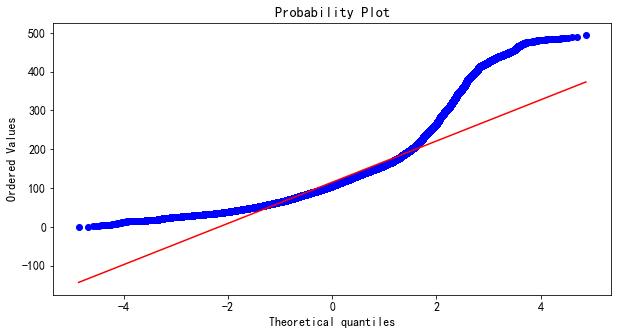

In [40]:
from scipy import stats

fig, ax = plt.subplots(figsize=[10,5])
prob = stats.probplot(original_plc_df['返料皮带F3_矿量'], dist=stats.norm, plot=ax) #生成Q-Q图
plt.show()

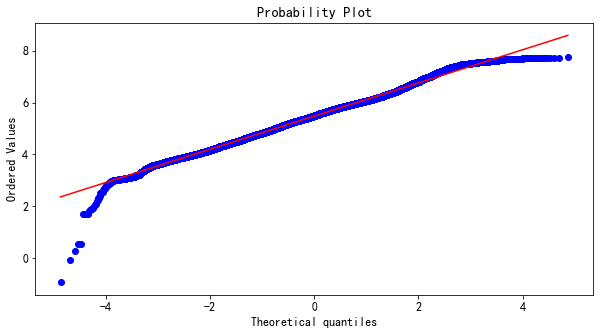

In [41]:
fig, ax = plt.subplots(figsize=[10,5])
prob = stats.probplot(nom_plc_df['返料皮带F3_矿量'], dist=stats.norm, plot=ax) #生成Q-Q图
plt.show()

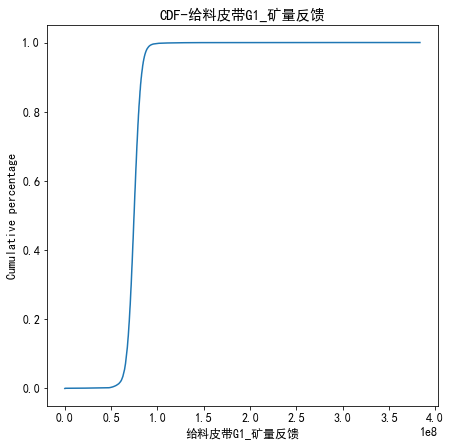

给料皮带G1_矿量反馈累计分布0.5%下界为52218385.16，99.5%上界为94675651.53





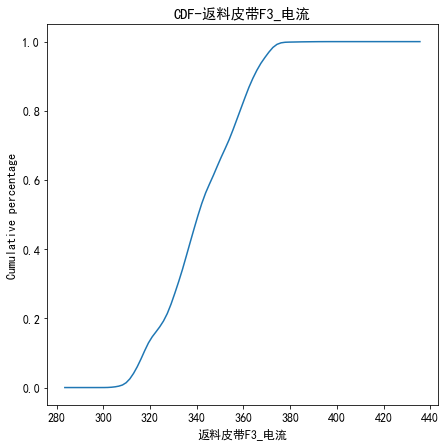

返料皮带F3_电流累计分布0.5%下界为308.23，99.5%上界为374.36





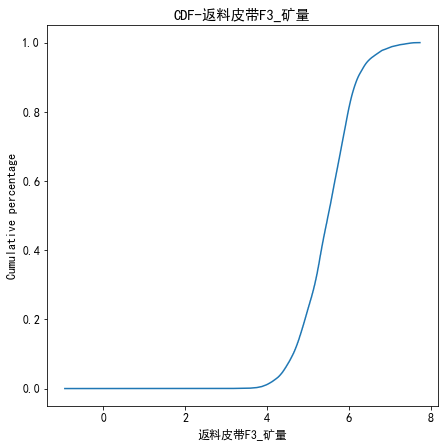

返料皮带F3_矿量累计分布0.5%下界为3.85，99.5%上界为7.31





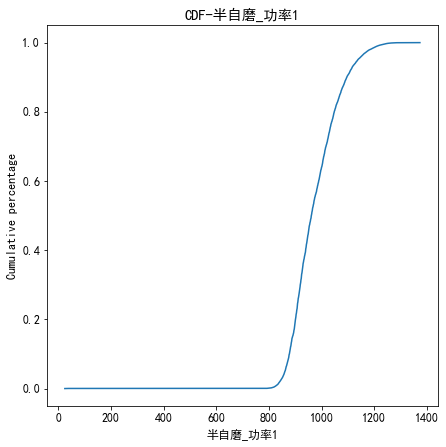

半自磨_功率1累计分布0.5%下界为820.15，99.5%上界为1232.5





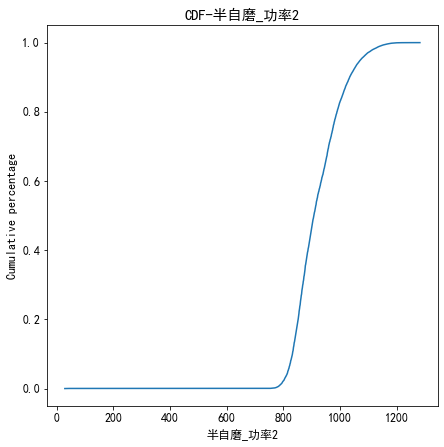

半自磨_功率2累计分布0.5%下界为780.0，99.5%上界为1160.27





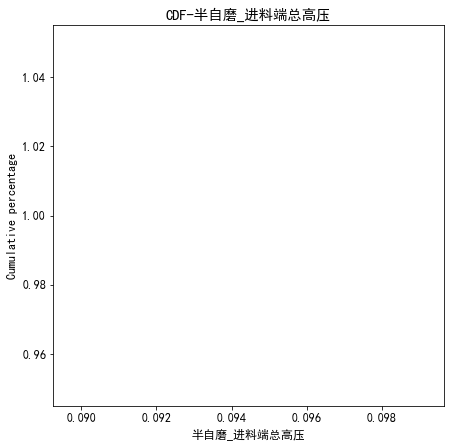

半自磨_进料端总高压累计分布0.5%下界为0.09，99.5%上界为nan





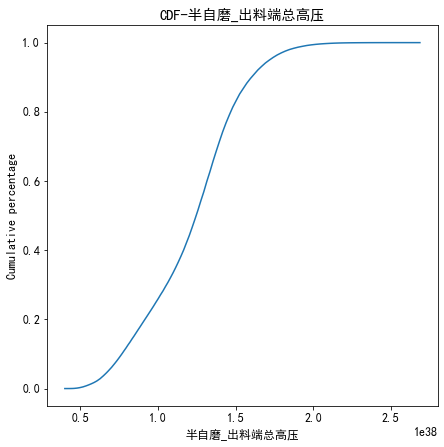

半自磨_出料端总高压累计分布0.5%下界为5.180705187668502e+37，99.5%上界为1.9871356457407926e+38





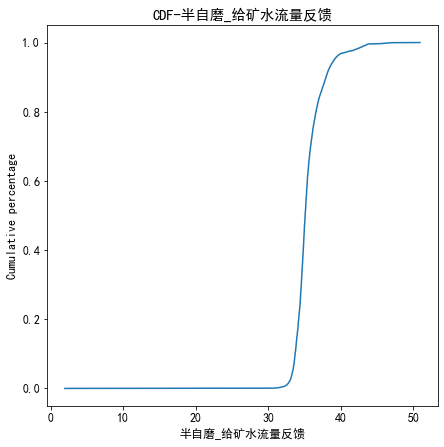

半自磨_给矿水流量反馈累计分布0.5%下界为32.01，99.5%上界为43.62





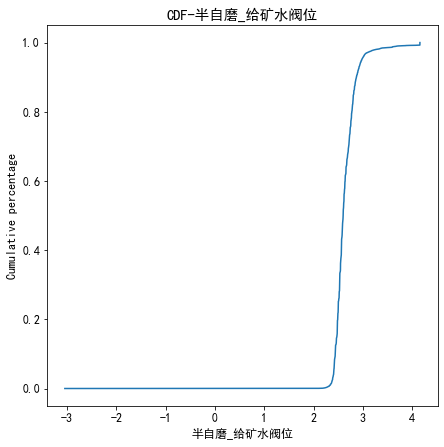

半自磨_给矿水阀位累计分布0.5%下界为2.29，99.5%上界为4.15





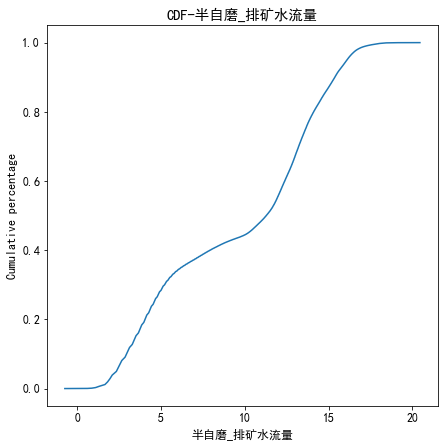

半自磨_排矿水流量累计分布0.5%下界为1.3，99.5%上界为17.7





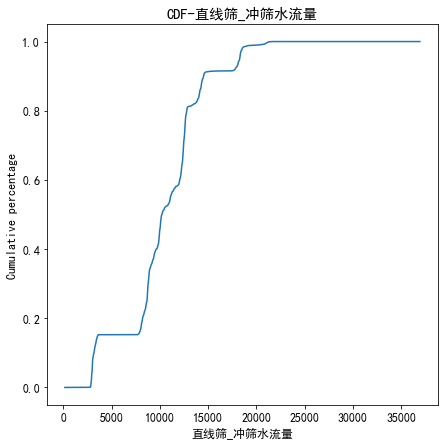

直线筛_冲筛水流量累计分布0.5%下界为2856.62，99.5%上界为20970.11





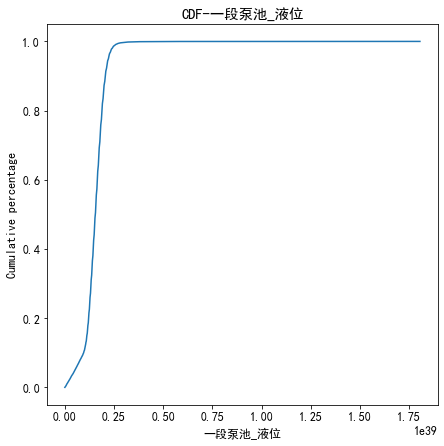

一段泵池_液位累计分布0.5%下界为6.526583510307636e+36，99.5%上界为2.7492155043315467e+38





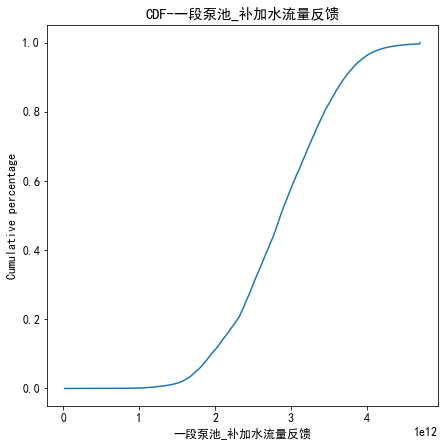

一段泵池_补加水流量反馈累计分布0.5%下界为1224817003706.06，99.5%上界为4580522215702.82





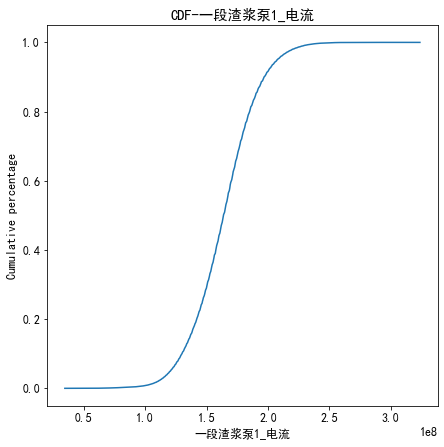

一段渣浆泵1_电流累计分布0.5%下界为93989588.46，99.5%上界为234915596.09





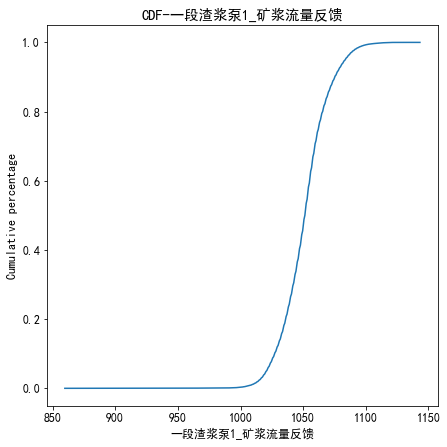

一段渣浆泵1_矿浆流量反馈累计分布0.5%下界为1003.8，99.5%上界为1102.74





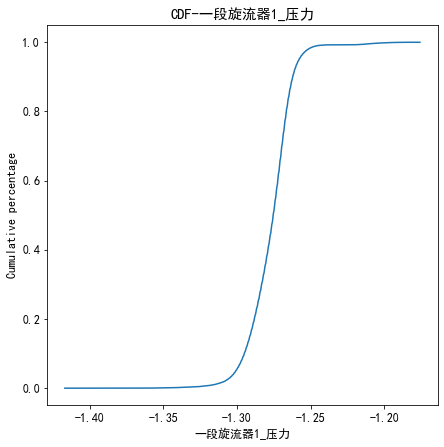

一段旋流器1_压力累计分布0.5%下界为-1.32，99.5%上界为-1.21





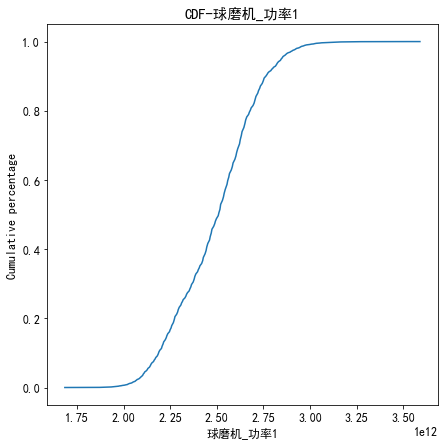

球磨机_功率1累计分布0.5%下界为1988069915353.85，99.5%上界为3029886338205.74





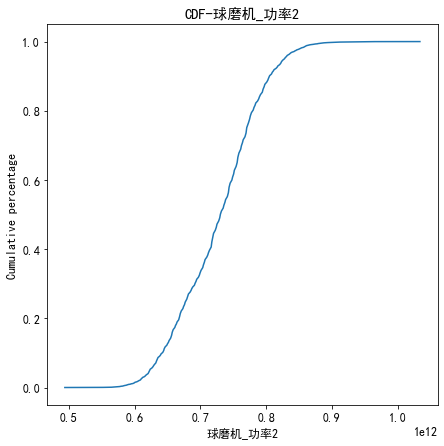

球磨机_功率2累计分布0.5%下界为583975154771.22，99.5%上界为880437869993.5





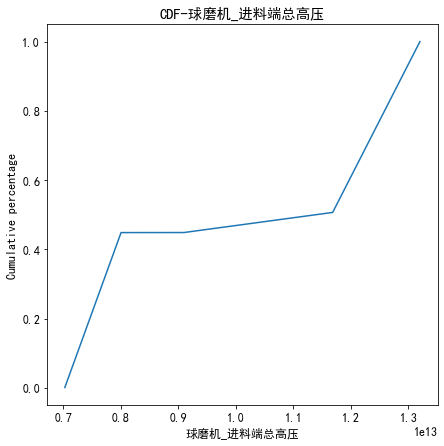

球磨机_进料端总高压累计分布0.5%下界为8001770830947.81，99.5%上界为11682843447157.94





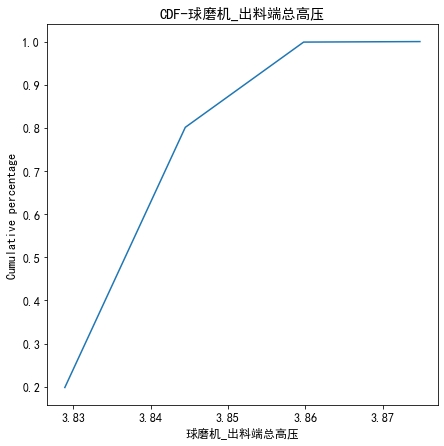

球磨机_出料端总高压累计分布0.5%下界为3.83，99.5%上界为3.84





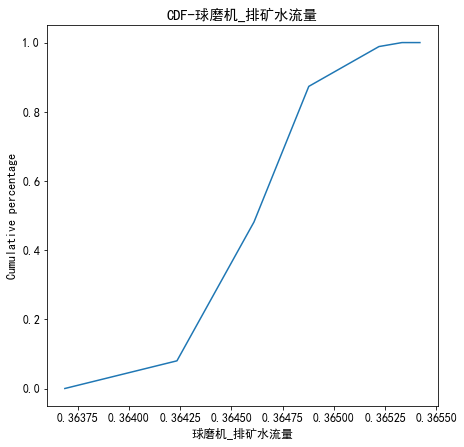

球磨机_排矿水流量累计分布0.5%下界为0.36，99.5%上界为0.37





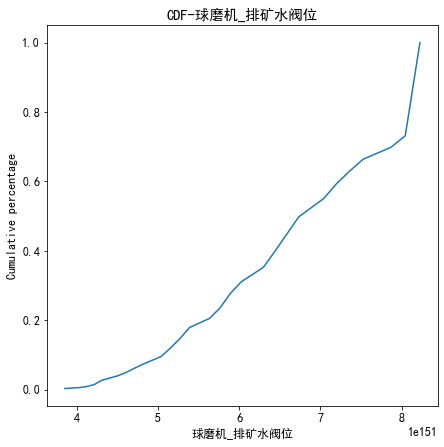

球磨机_排矿水阀位累计分布0.5%下界为4.022984295982492e+151，99.5%上界为8.045611369125131e+151





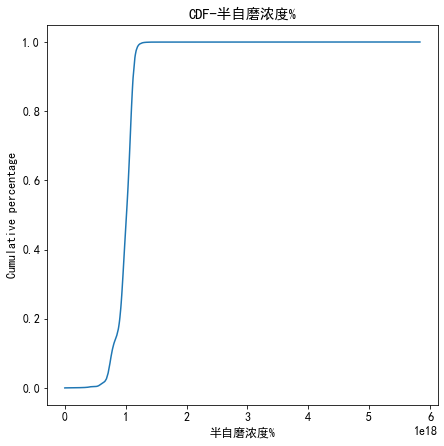

半自磨浓度%累计分布0.5%下界为5.336138723483417e+17，99.5%上界为1.2374584116861102e+18





In [42]:
denominator = len(nom_plc_df)

minpoint_lst = []
maxpoint_lst = []

def cdf(df):
    for cols in df.columns:
        Data = pd.Series(df[cols])
        Fre = Data.value_counts()
        Fre_sort = Fre.sort_index(axis = 0, ascending = True)
        Fre_df = Fre_sort.reset_index()
        Fre_df.columns = ['nums', 'fre']
        Fre_df['fre']=Fre_df['fre']/denominator
        Fre_df['cumsum']=np.cumsum(Fre_df['fre'])

        #创建画布
        plot=plt.figure()
        #只有一张图，也可以多张
        ax1=plot.add_subplot(1,1,1)
        #按照Rds列为横坐标，累计概率分布为纵坐标作图
        ax1.plot(Fre_df['nums'],Fre_df['cumsum'])
        #图的标题
        ax1.set_title('CDF-{}'.format(cols))
        #横轴名
        ax1.set_xlabel('{}'.format(cols))
        #纵轴名
        ax1.set_ylabel('Cumulative percentage')
        #横轴的界限
        # ax1.set_xlim(0.1,0.5)
        #图片显示
        plt.show()
        
        max_df = Fre_df.loc[Fre_df['cumsum'] < 0.995]
        maxpoint = max_df['nums'].max()
        maxpoint = round(maxpoint,2)
        
        min_df = Fre_df.loc[Fre_df['cumsum'] > 0.005]
        minpoint = min_df['nums'].min()
        minpoint = round(minpoint,2)
        
        print('{}累计分布0.5%下界为{}，99.5%上界为{}'.format(cols, minpoint, maxpoint))
        print("\n"*2)
        minpoint_lst.append(minpoint)
        maxpoint_lst.append(maxpoint)

cdf(nom_plc_df.iloc[:,1:])

In [43]:
minoutlen_lst = []
maxoutlen_lst = []

nom_plc = nom_plc_df.iloc[:,1:]
for i in range(len(nom_plc.columns)):
    maxout_df = mid_plc[nom_plc.iloc[:,i] > maxpoint_lst[i]]
    maxout_len = len(maxout_df)
    maxoutlen_lst.append(maxout_len)
    
    minout_df = nom_plc[nom_plc.iloc[:,i] < minpoint_lst[i]]
    minout_len = len(minout_df)
    minoutlen_lst.append(minout_len)
    
feature_lst = list(nom_plc.columns)

out_dic = {'特征':feature_lst, '下限值':minpoint_lst, '下限样本数量':minoutlen_lst, '上限值':maxpoint_lst, '上限样本数量':maxoutlen_lst}
out_df = pd.DataFrame(out_dic)
out_df

,特征,下限值,下限样本数量,上限值,上限样本数量
0,给料皮带G1_矿量反馈,5.221839e+07,6002,9.467565e+07,6148
1,返料皮带F3_电流,3.082300e+02,4928,3.743600e+02,20377
2,返料皮带F3_矿量,3.850000e+00,6252,7.310000e+00,6135
3,半自磨_功率1,8.201500e+02,5623,1.232500e+03,6251
4,半自磨_功率2,7.800000e+02,5966,1.160270e+03,6309
5,半自磨_进料端总高压,9.000000e-02,0,NaN,0
6,半自磨_出料端总高压,5.180705e+37,4937,1.987136e+38,7852
7,半自磨_给矿水流量反馈,3.201000e+01,5922,4.362000e+01,6275
8,半自磨_给矿水阀位,2.290000e+00,6176,4.150000e+00,8815
9,半自磨_排矿水流量,1.300000e+00,7705,1.770000e+01,6064


In [44]:
# outcome_col = '1系列原矿处理量t/h'
# outcome_col = '1系列返矿量t/h'
# outcome_col = '1系列1段旋流器A组溢流浓度/%'
# outcome_col = '1系列强磁尾矿品位TFe/%'
outcome_col = '1系列1段旋流器A组溢流粒度/-200目'

# target_cols = ['半自磨_功率1', '半自磨_功率2', '球磨机_功率1', '球磨机_功率2']
# target_cols = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '半自磨_进料端总高压','一段泵池_液位', '一段渣浆泵1_矿浆流量反馈', '一段渣浆泵2_矿浆流量反馈','一段旋流器1_压力', '球磨机_出料端总高压']
target_cols = ['给料皮带G1_矿量反馈', '返料皮带F3_矿量', '半自磨_功率1', '一段泵池_液位', '一段渣浆泵1_矿浆流量反馈', '一段旋流器1_压力', '球磨机_功率1']
shifting_labels = ['平均值时间范围（分钟）', '时间戳移动量（分钟）']

huayan_df = original_huayan_df[['时间'] + [outcome_col]].copy()

all_shifted_df = []

for group_time_min in (0.5, 1, 5, 10, 15):
    for shifted_time_min in (0, 1, 5, 10, 15, 20, 25, 30, 40, 50):
        if (group_time_min / 2) > shifted_time_min:
            continue
        plc_df = nom_plc_df[['时间'] + target_cols].copy()

        plc_df.loc[:, '时间'] = plc_df.loc[:, '时间'] - timedelta(minutes=shifted_time_min)
        plc_df.loc[:, '时间'] = plc_df.loc[:, '时间'].dt.round(f'{group_time_min}min')

        plc_df = plc_df.groupby("时间").mean().reset_index()

        shifted_corr_single_df = huayan_df.merge(plc_df, how="left", on="时间").dropna().corr().loc[[outcome_col], target_cols].abs().round(2)
        shifted_corr_single_df[shifting_labels] = (group_time_min, shifted_time_min)
        
        all_shifted_df.append(shifted_corr_single_df)
all_shifted_df = pd.concat(all_shifted_df).reset_index(drop=True)

对于给料皮带G1_矿量反馈, 使用30分钟之前，前后共10分钟数据的平均值 (相关系数绝对值: 0.160)


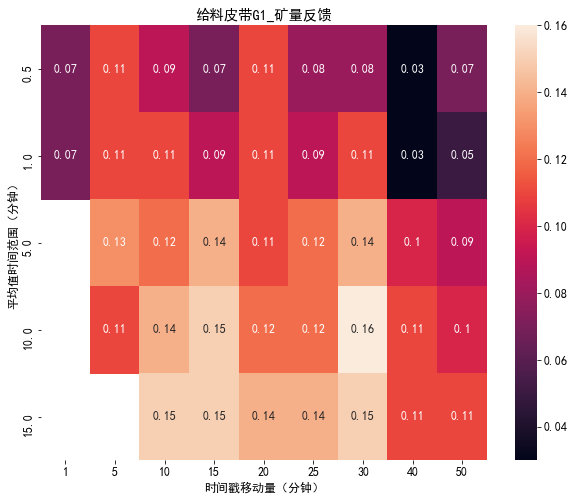





对于返料皮带F3_矿量, 使用40分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.180)


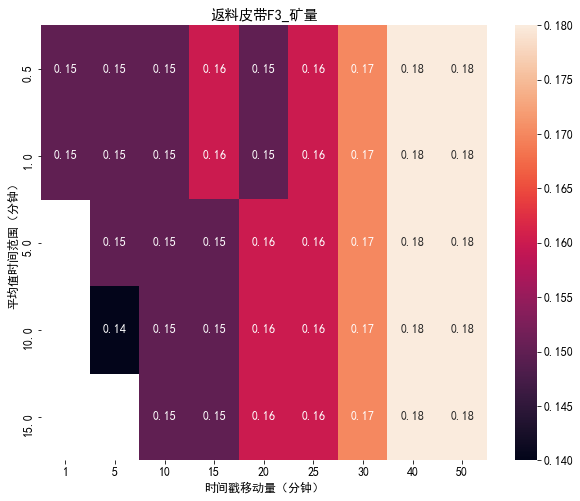





对于半自磨_功率1, 使用1分钟之前，前后共1分钟数据的平均值 (相关系数绝对值: 0.200)


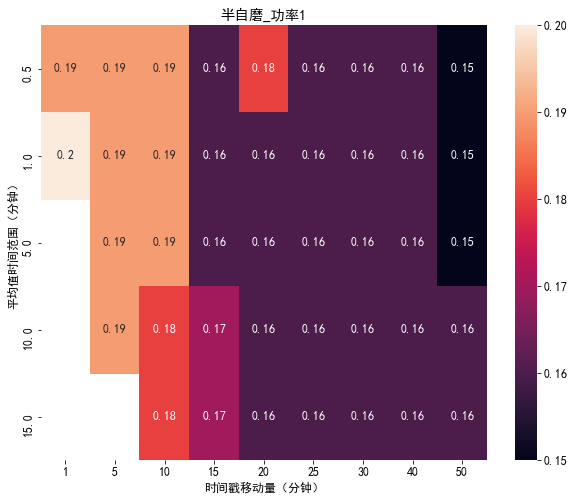





对于一段泵池_液位, 使用15分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.070)


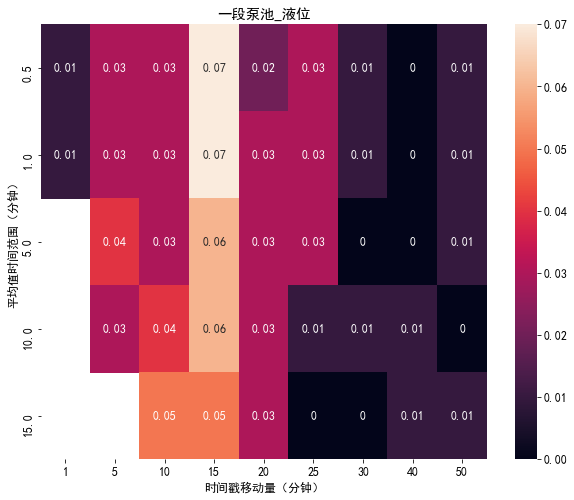





对于一段渣浆泵1_矿浆流量反馈, 使用1分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.200)


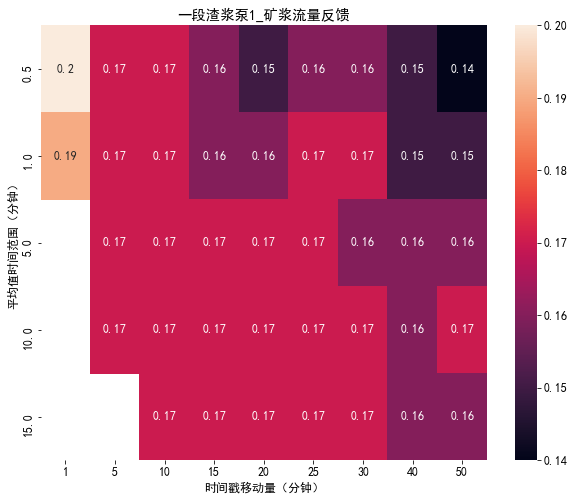





对于一段旋流器1_压力, 使用10分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.220)


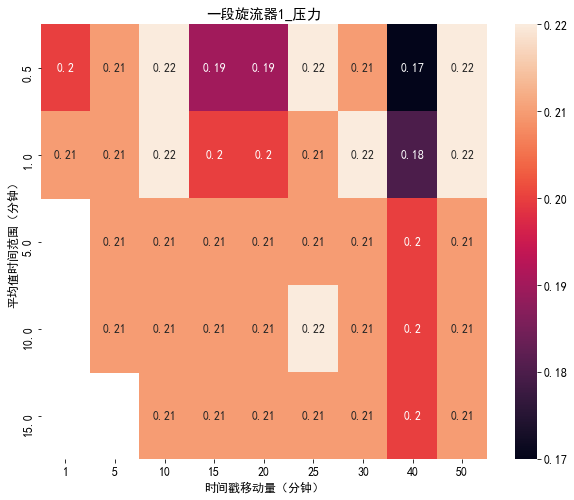





对于球磨机_功率1, 使用25分钟之前，前后共0.5分钟数据的平均值 (相关系数绝对值: 0.050)


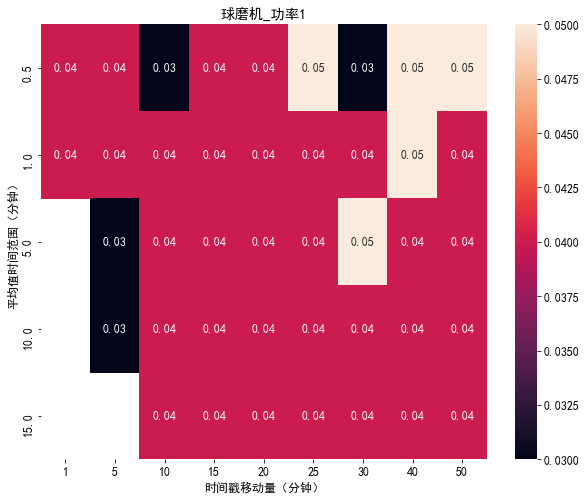

In [45]:
for corr_col in target_cols:
    plt.figure(figsize=(10, 8))
    pivoted_hm_df = pd.pivot_table(all_shifted_df, values=corr_col, index=shifting_labels[0], columns=shifting_labels[1])
    sns.heatmap(pivoted_hm_df, annot=True)
    plt.title(corr_col)
    
    group_time_min, shifted_time_min, corr_val = all_shifted_df.loc[all_shifted_df[corr_col].idxmax(), shifting_labels + [corr_col]]
    print(f"对于{corr_col}, 使用{shifted_time_min:g}分钟之前，前后共{group_time_min:g}分钟数据的平均值 (相关系数绝对值: {corr_val:.3f})")
    plt.show()
    print("\n"*3)

In [66]:
df0 = nom_plc_df[['时间','给料皮带G1_矿量反馈']]
df1 = nom_plc_df[['时间','返料皮带F3_电流', '返料皮带F3_矿量']]
df2 = nom_plc_df[['时间','半自磨_功率1', '半自磨_功率2','半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', 
                       '半自磨_给矿水阀位','半自磨_排矿水流量', '半自磨浓度%', '直线筛_冲筛水流量']]
df3 = nom_plc_df[['时间','一段泵池_液位', '一段泵池_补加水流量反馈']]
df4 = nom_plc_df[['时间','一段渣浆泵1_电流', '一段渣浆泵1_矿浆流量反馈']]

df5 = nom_plc_df[['时间','一段旋流器1_压力']]
df6 = nom_plc_df[['时间','球磨机_功率1','球磨机_功率2', '球磨机_进料端总高压', '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位']]

In [67]:
df_set = [df0,df1,df2,df3,df4,df5,df6]
shift = [30,40,10,15,5,5,5]
freq = ['10min','5min','5min','1min','5min','5min','1min']
for i in range(7):
    lll = len(df_set[i].columns)
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'] - timedelta(minutes=shift[i])
    df_set[i].loc[:, '时间'] = df_set[i].loc[:, '时间'].dt.round(freq[i])
    df_set[i] = df_set[i].groupby("时间").mean().reset_index()
    df_set[i] = df_set[i].merge(original_huayan_df, how="left", on="时间").dropna(axis = 0,how = 'any')

    df_set[i] = df_set[i].iloc[:,:lll]
    df_set[i].reset_index(inplace=True,drop=True)

In [68]:
from functools import reduce

df_list = [df_set[0],df_set[1],df_set[2],df_set[3],df_set[4],df_set[5],df_set[6], original_huayan_df]
nom_df = reduce(lambda left, right: pd.merge(left, right, on=['时间']), df_list)
nom_df

,时间,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,...,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%,1系列1段旋流器A组溢流粒度/-200目
0,2022-02-26 17:00:00,7.615899e+07,355.666047,4.833655,930.495023,881.874262,0.094446,1.112610e+38,33.762077,2.557381,...,1023.630977,-1.281008,2.143146e+12,6.357131e+11,1.187259e+13,3.832806,0.364753,5.264938e+151,19.81,88.63
1,2022-02-26 21:00:00,7.589573e+07,356.580604,4.480033,911.510754,862.925829,0.094446,1.132256e+38,33.568468,2.468837,...,1021.593902,-1.281856,2.151473e+12,6.271179e+11,1.168284e+13,3.842543,0.364820,4.813845e+151,20.71,89.13
2,2022-02-26 23:00:00,8.059954e+07,311.676405,5.082028,915.653182,862.103804,0.094446,1.102936e+38,33.225765,2.425673,...,1024.798760,-1.278589,2.157882e+12,6.435986e+11,1.193584e+13,3.841893,0.364801,4.707126e+151,20.46,88.86
3,2022-02-27 01:00:00,7.549235e+07,310.921550,4.954381,945.205660,892.081664,0.094446,1.226095e+38,33.659701,2.472273,...,1023.083469,-1.284530,2.231410e+12,6.431779e+11,1.286349e+13,3.844490,0.364788,4.500753e+151,18.02,89.41
4,2022-02-27 03:00:00,7.608785e+07,313.368898,4.592716,916.844885,869.162323,0.094446,1.185130e+38,33.263575,2.475990,...,1023.759823,-1.279942,2.164272e+12,6.463132e+11,1.168284e+13,3.844490,0.364615,4.303263e+151,20.06,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2022-05-25 11:00:00,7.554889e+07,360.091170,5.652936,850.847553,805.377341,0.094446,6.899343e+37,34.508859,2.687787,...,1067.426161,-1.264125,2.660045e+12,7.816373e+11,7.349734e+12,3.834104,0.364665,6.731933e+151,20.73,88.49
956,2022-05-25 13:00:00,7.554248e+07,337.618020,5.971834,863.279609,817.653189,0.094446,6.850754e+37,34.872688,2.737276,...,1051.768649,-1.272394,2.615790e+12,7.775207e+11,8.001771e+12,3.832506,0.364883,7.868512e+151,20.62,88.47
957,2022-05-25 15:00:00,7.611755e+07,352.371259,6.501515,916.666110,864.155978,0.094446,7.744967e+37,35.805746,2.808360,...,1036.687704,-1.280964,2.845919e+12,8.155522e+11,8.001771e+12,3.828911,0.364592,8.226738e+151,20.97,88.24
958,2022-05-25 17:00:00,7.579623e+07,363.185469,5.945536,868.460282,820.569729,0.094446,6.559972e+37,35.373964,2.780584,...,1038.428304,-1.283535,2.733528e+12,7.954058e+11,8.001771e+12,3.828911,0.364975,8.226738e+151,20.99,88.21


In [69]:
nom_df.corr()['1系列1段旋流器A组溢流粒度/-200目'].sort_values(ascending=False)

1系列1段旋流器A组溢流粒度/-200目    1.000000
一段泵池_补加水流量反馈            0.359487
球磨机_出料端总高压              0.303147
半自磨_出料端总高压              0.265235
球磨机_进料端总高压              0.221996
一段旋流器1_压力               0.209854
半自磨_功率1                 0.185980
半自磨_功率2                 0.183851
一段渣浆泵1_矿浆流量反馈           0.173063
球磨机_排矿水流量               0.118563
直线筛_冲筛水流量               0.108157
一段泵池_液位                 0.062682
半自磨_给矿水流量反馈            -0.022323
返料皮带F3_电流              -0.031707
球磨机_功率2                -0.036238
球磨机_功率1                -0.039428
半自磨_排矿水流量              -0.074574
半自磨浓度%                 -0.101850
球磨机_排矿水阀位              -0.117965
给料皮带G1_矿量反馈            -0.152212
返料皮带F3_矿量              -0.178826
一段渣浆泵1_电流              -0.189636
半自磨_给矿水阀位              -0.213514
1系列1段旋流器A组溢流浓度/%       -0.869433
半自磨_进料端总高压                   NaN
Name: 1系列1段旋流器A组溢流粒度/-200目, dtype: float64

In [70]:
from sklearn.preprocessing import StandardScaler

target = nom_df['1系列1段旋流器A组溢流粒度/-200目']
regressors = [x for x in nom_df.columns if x not in ['时间','1系列1段旋流器A组溢流粒度/-200目']]
features = nom_df[regressors] 
features=StandardScaler().fit_transform(features) #进行标准化处理
features = pd.DataFrame(features)
c = ['给料皮带G1_矿量反馈', '返料皮带F3_电流', '返料皮带F3_矿量', '半自磨_功率1', '半自磨_功率2',
       '半自磨_进料端总高压', '半自磨_出料端总高压', '半自磨_给矿水流量反馈', '半自磨_给矿水阀位', '半自磨_排矿水流量',
       '半自磨浓度%', '直线筛_冲筛水流量', '一段泵池_液位', '一段泵池_补加水流量反馈', '一段渣浆泵1_电流',
       '一段渣浆泵1_矿浆流量反馈', '一段旋流器1_压力', '球磨机_功率1', '球磨机_功率2', '球磨机_进料端总高压',
       '球磨机_出料端总高压', '球磨机_排矿水流量', '球磨机_排矿水阀位', '1系列1段旋流器A组溢流浓度/%']
features.columns = c
features.head()

,给料皮带G1_矿量反馈,返料皮带F3_电流,返料皮带F3_矿量,半自磨_功率1,半自磨_功率2,半自磨_进料端总高压,半自磨_出料端总高压,半自磨_给矿水流量反馈,半自磨_给矿水阀位,半自磨_排矿水流量,...,一段渣浆泵1_电流,一段渣浆泵1_矿浆流量反馈,一段旋流器1_压力,球磨机_功率1,球磨机_功率2,球磨机_进料端总高压,球磨机_出料端总高压,球磨机_排矿水流量,球磨机_排矿水阀位,1系列1段旋流器A组溢流浓度/%
0,0.416174,0.801452,-0.920811,-0.603672,-0.568861,1.387779e-17,-0.447430,-0.928660,-0.300236,-0.986665,...,-1.717222,-1.641845,-0.445894,-1.759770,-1.670441,0.241719,-1.330682,-0.125105,-1.216360,0.002498
1,0.342098,0.853541,-1.488716,-0.824510,-0.804923,1.387779e-17,-0.378535,-1.033824,-0.727292,0.150170,...,-2.182960,-1.761102,-0.514754,-1.715532,-1.834918,0.163453,-0.278553,0.303941,-1.586634,1.070851
2,1.665669,-1.704020,-0.521931,-0.776322,-0.815164,1.387779e-17,-0.481359,-1.219972,-0.935479,0.992634,...,-1.539523,-1.573478,-0.249503,-1.681488,-1.519544,0.267807,-0.348695,0.180992,-1.674233,0.774086
3,0.228594,-1.747013,-0.726928,-0.432547,-0.441695,1.387779e-17,-0.049444,-0.984268,-0.710723,1.025193,...,-1.823400,-1.673898,-0.731851,-1.290866,-1.527595,0.650441,-0.068127,0.100725,-1.843631,-2.122338
4,0.396158,-1.607622,-1.307751,-0.762459,-0.727228,1.387779e-17,-0.193107,-1.199435,-0.692793,1.084836,...,-1.507860,-1.634301,-0.359348,-1.647539,-1.467597,0.163453,-0.068127,-1.007536,-2.005738,0.299263


In [71]:
#分割训练集测试集
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size = 0.3,random_state=seed)

In [72]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=seed)
forest.fit(Xtrain,Ytrain)

RandomForestRegressor(random_state=123)

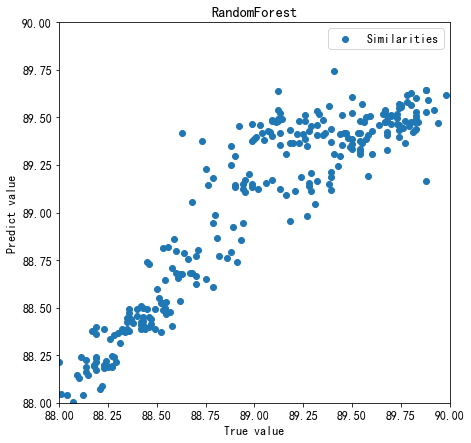

In [73]:
# 预测结果可视化
plt.style.use({'figure.figsize':(7,7)})
result = forest.predict(Xtest)
plt.figure()
plt.scatter(Ytest, result)
plt.xlim(88, 90)
plt.ylim(88, 90)
plt.xlabel('True value')
plt.ylabel('Predict value')
plt.title(f"RandomForest")
plt.legend(loc="best", labels = ['Similarities'])
plt.show()

In [74]:
rfr_score = forest.score(Xtest, Ytest)
print('rfr_score:',rfr_score.round(3))

from sklearn import metrics
rfr_rmse = metrics.mean_squared_error(Ytest,result) ** 0.5
print('rfr_rmse:',rfr_rmse.round(3))

rfr_score: 0.843
rfr_rmse: 0.23


********************

### Tuning random forest through hyperopt

In [75]:
from hyperopt import tpe,hp,Trials
from hyperopt.fmin import fmin

In [76]:
def objective(params):
    est=int(params['n_estimators'])
    md=int(params['max_depth'])
    msl=int(params['min_samples_leaf'])
    mss=int(params['min_samples_split'])
    model=RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss,random_state=seed)
    model.fit(Xtrain,Ytrain)
    pred=model.predict(Xtest)
    score=metrics.mean_squared_error(Ytest,pred)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',3,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500)
    return best

trial=Trials()
best=optimize(trial)

100%|████████████████████████████████████████████| 500/500 [14:08<00:00,  1.70s/trial, best loss: 0.052431530611565906]


In [77]:
best

{'max_depth': 15.58205728805237,
 'min_samples_leaf': 4.391452247547841,
 'min_samples_split': 4.340657976533625,
 'n_estimators': 434.039366680649}

In [78]:
rfr_opt = RandomForestRegressor(n_estimators=434,max_depth=15,min_samples_split=4,min_samples_leaf=4, random_state=seed)
rfr_opt.fit(Xtrain,Ytrain)
pred_rfr_opt = rfr_opt.predict(Xtest)
rfr_rmse = metrics.mean_squared_error(Ytest, pred_rfr_opt) ** 0.5
rfr_score = rfr_opt.score(Xtest, Ytest)
print('rfr_score:', rfr_score.round(3))
print('rfr_rmse:', rfr_rmse.round(3))

rfr_score: 0.845
rfr_rmse: 0.229


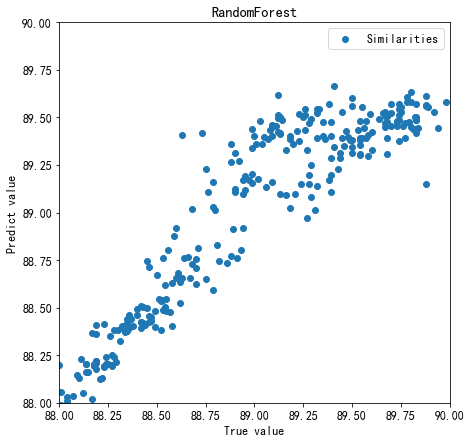

In [79]:
# 预测结果可视化
plt.style.use({'figure.figsize':(7,7)})
result = rfr_opt.predict(Xtest)
plt.figure()
plt.scatter(Ytest, result)
plt.xlim(88, 90)
plt.ylim(88, 90)
plt.xlabel('True value')
plt.ylabel('Predict value')
plt.title(f"RandomForest")
plt.legend(loc="best", labels = ['Similarities'])
plt.show()

In [ ]:
aaa

In [ ]:
TID=[t['tid'] for t in trial.trials]
Loss=[t['result']['loss'] for t in trial.trials]
maxd=[t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest=[t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss=[t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl=[t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr=pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})

In [ ]:
plt.subplots(3,2,figsize=(10,10))
plt.subplot(3,2,1)
sns.scatterplot(x='tid',y='max_depth',data=hyperopt_rfr)
plt.subplot(3,2,2)
sns.scatterplot(x='tid',y='loss',data=hyperopt_rfr)
plt.subplot(3,2,3)
sns.scatterplot(x='tid',y='n_estimators',data=hyperopt_rfr)
plt.subplot(3,2,4)
sns.scatterplot(x='tid',y='min_samples_leaf',data=hyperopt_rfr)
plt.subplot(3,2,5)
sns.scatterplot(x='tid',y='min_samples_split',data=hyperopt_rfr)

plt.tight_layout()

**************************

### DTW

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw_ndim

In [ ]:
original_plc_df.iloc[50300:50400,:]  #3.2  13点附近

In [ ]:
original_huayan_df.iloc[60:90,:]   #3.2 包括13点

In [ ]:
s1 = list(original_plc_df.iloc[50300:50400,1])
s2 = list(original_huayan_df.iloc[60:90,1])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warping.png")

In [ ]:
path

In [ ]:
att_plc_df =  original_plc_df.copy()
# mid_plc_df.drop(['时间'], axis = 1, inplace = True)

#半自磨浓度

def concentration(df):
    Dry_weight = (df['给料皮带G1_矿量反馈'] + df['返料皮带F3_矿量']) * (1-0.009) + (df['给料皮带G1_矿量反馈'] * 0.001 * 0.61)
    Total_weight = df['给料皮带G1_矿量反馈'] + df['返料皮带F3_矿量'] + df['半自磨_给矿水流量反馈'] + (df['给料皮带G1_矿量反馈'] * 0.001 * 0.61)
    con = ((Dry_weight / Total_weight)) * 100
    df['半自磨浓度%'] = pd.DataFrame(con)
concentration(att_plc_df)


def RSR(df):
    rsr = (df['返料皮带F3_矿量'] / df['给料皮带G1_矿量反馈'])
    rsr = round(rsr,2)
    df['半自磨返砂比'] = pd.DataFrame(rsr)
RSR(att_plc_df)

In [ ]:
att_plc_df

In [ ]:
att_plc_df['半自磨浓度%'].max()

In [ ]:
att_plc_df.describe()

In [ ]:
att_plc_df.columns

In [ ]:
att_plc_df['时间'] = att_plc_df['时间'].map(lambda x:x.strftime('%Y-%m-%d %H:%M:%S'))
att_plc_df['时间'] = att_plc_df['时间'].apply(lambda x:x[0:16])
att_plc_df['时间'] = pd.to_datetime(att_plc_df['时间']) # date转为时间格式
att_plc_df = att_plc_df.groupby("时间").mean().reset_index()
att_plc_df

In [ ]:
att_plc_df.columns

In [ ]:
att_plc_df

In [ ]:
s = att_plc_df.iloc[4300:4500,:]
s

In [ ]:
s.set_index('时间',inplace=True)
s.index=pd.to_datetime(s.index)
s

In [ ]:
s.iloc[:,1].plot()

In [ ]:
plt.plot(s.iloc[:,1].rolling(10, min_periods=2).mean())
plt.plot(s.iloc[:,1].ewm(span=10).mean())
plt.show()

In [ ]:
for i in s.columns:
    plt.plot(s[i].rolling(10, min_periods=2).mean())
    plt.plot(s[i].ewm(span=10).mean())
    plt.title('{}'.format(i))
    plt.xlabel('Time Point')
    plt.ylabel('Value')
    plt.show()

In [ ]:
for i in s.columns:
    plt.plot(s[i].pct_change())  # （后一值-当前值）/当前值
    plt.title('{}'.format(i))
    plt.xlabel('Time Point')
    plt.ylabel('Variation')
    plt.show()